# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [2]:
data=pd.read_csv('stock_data.csv')
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [3]:
data.shape

(340, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- The dataset comprises both categorical data, including ticker symbols, securities, GICS sector, and sub-industry classifications, and numerical data, such as current prices, volatility, financial ratios, and earnings-related metrics.
- It offers a comprehensive range of financial information on 340 publicly traded companies, making it suitable for financial analysis and sector-based studies.

In [5]:
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [6]:
df=data.copy()

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


- The dataset consists of 340 unique ticker symbols and securities, representing a variety of GICS sectors and sub-industries within the stock market.
- The data provides numerical statistics for features such as "Current Price," "Price Change," "Volatility," "ROE," "Cash Ratio," "Net Cash Flow," "Net Income," "Earnings Per Share," "Estimated Shares Outstanding," "P/E Ratio," and "P/B Ratio."
- Descriptive statistics include count, unique values, most frequent item (top), frequency (freq), mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) for each feature.
- For example, "Current Price" has an average of approximately $80.86, ranging from a minimum of $4.50 to a maximum of 1,274.95.
- "P/E Ratio" exhibits a mean of approximately 32.61 with a standard deviation of approximately 44.35, indicating variability in this financial metric.
- "P/B Ratio" displays a negative mean value, suggesting that some companies may have book values lower than their market prices.

In [8]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- No missing values

In [9]:
df.duplicated().sum()

0

- No duplicated values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

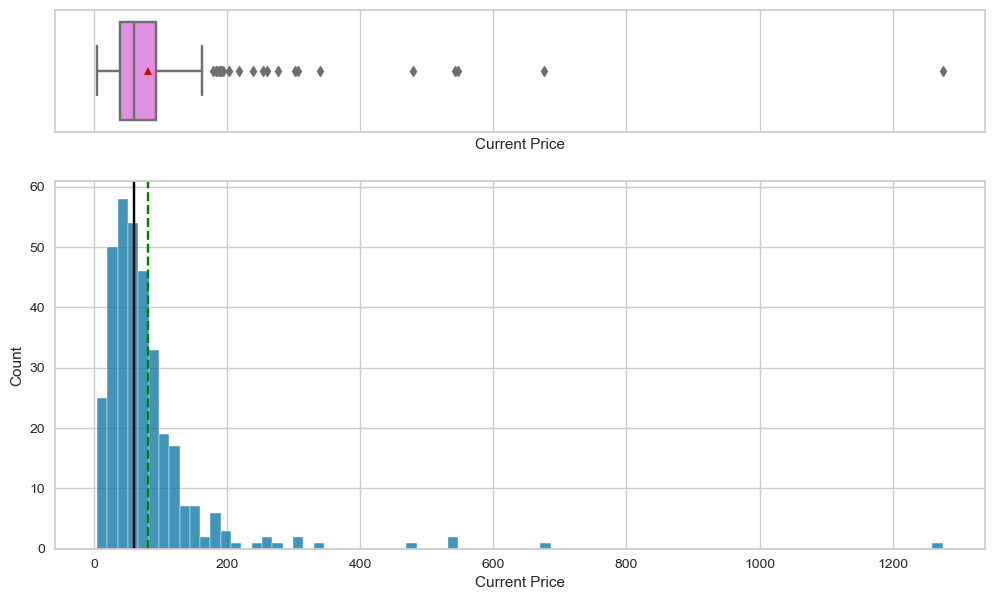

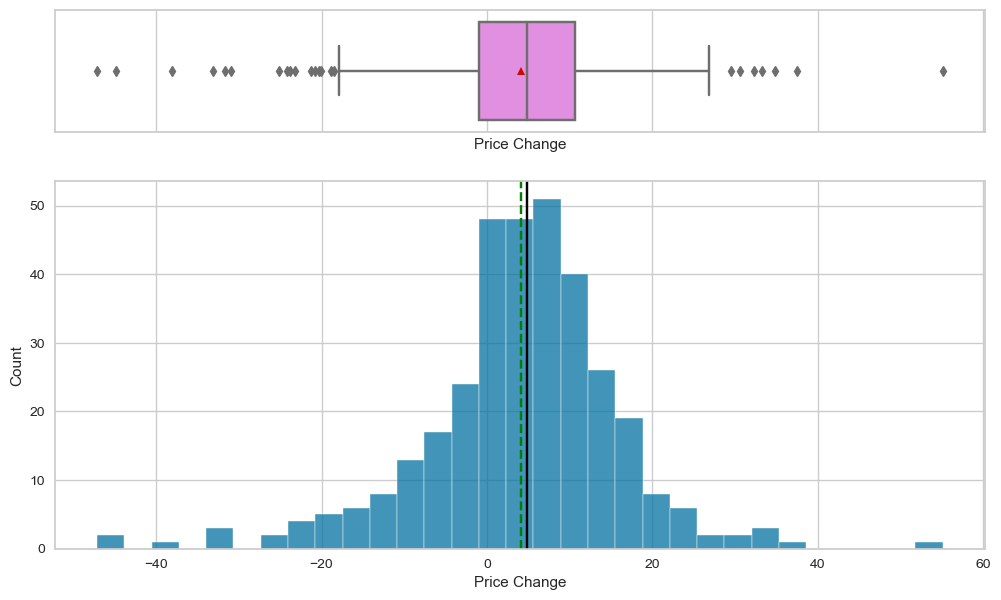

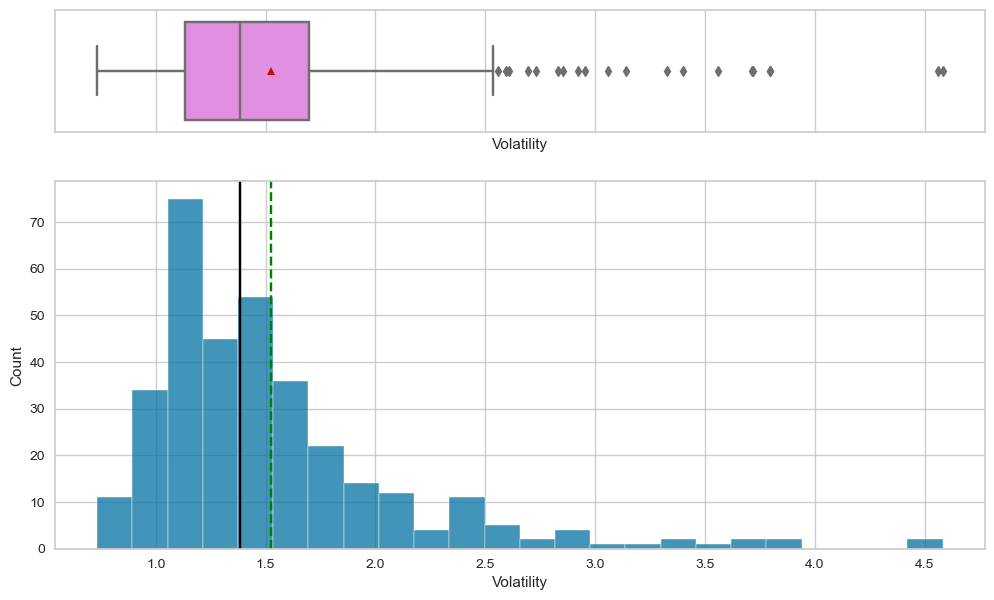

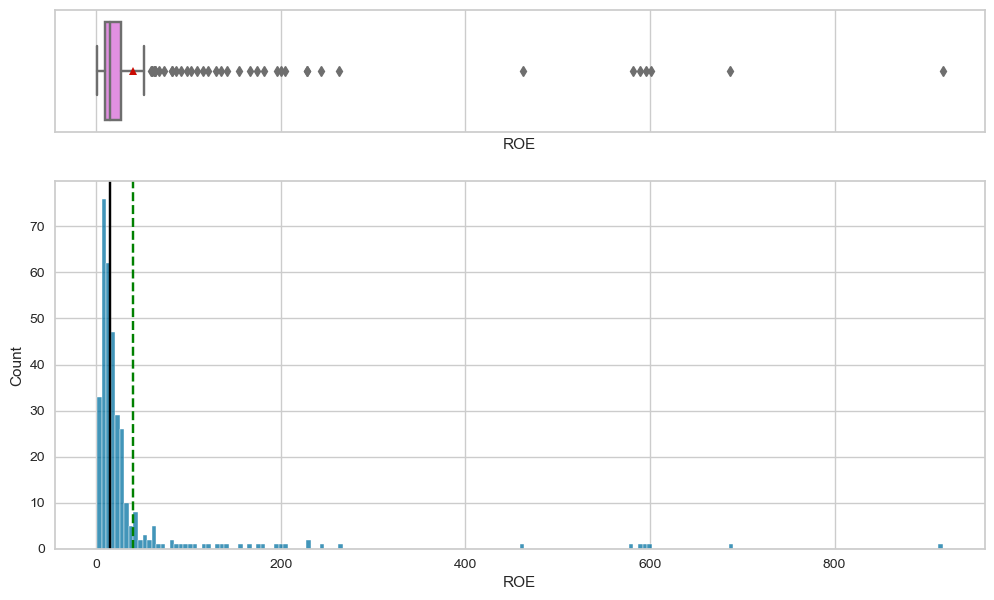

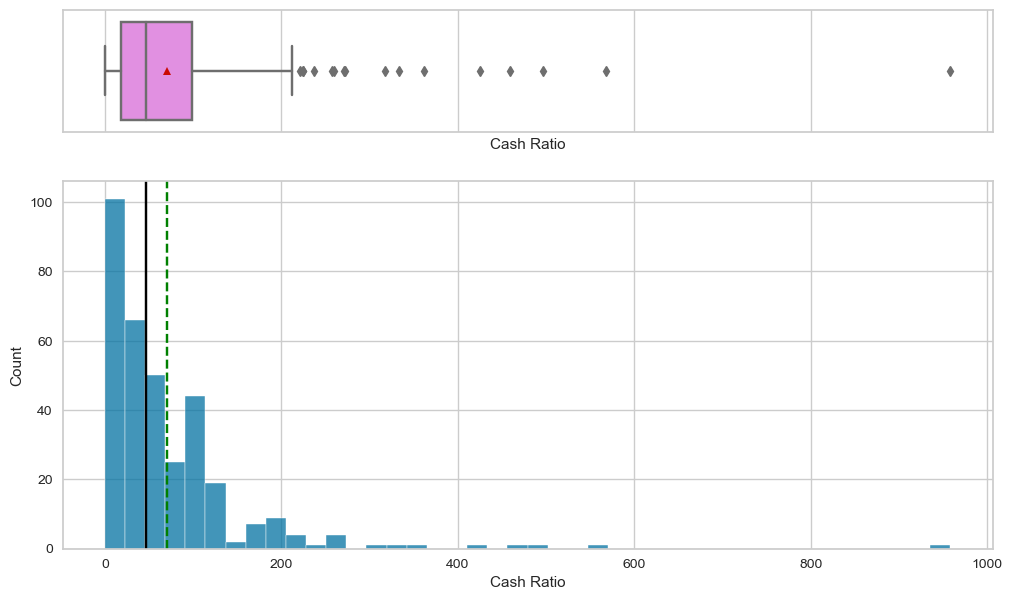

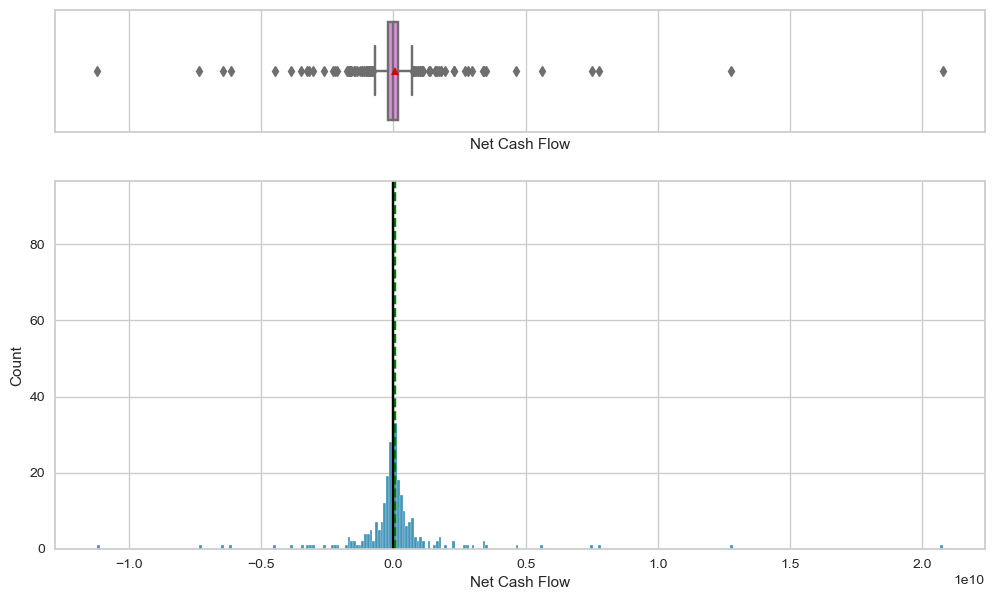

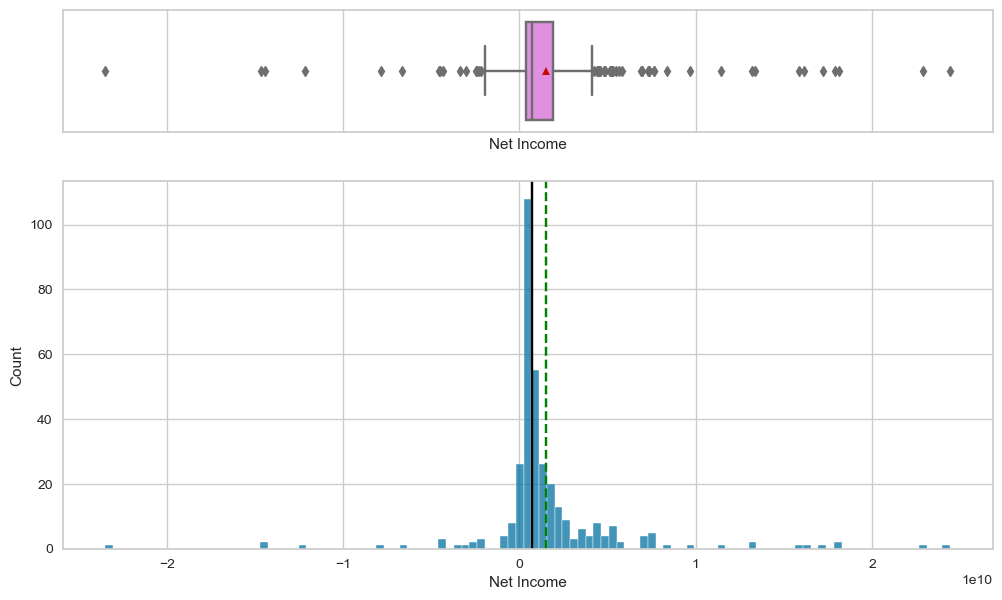

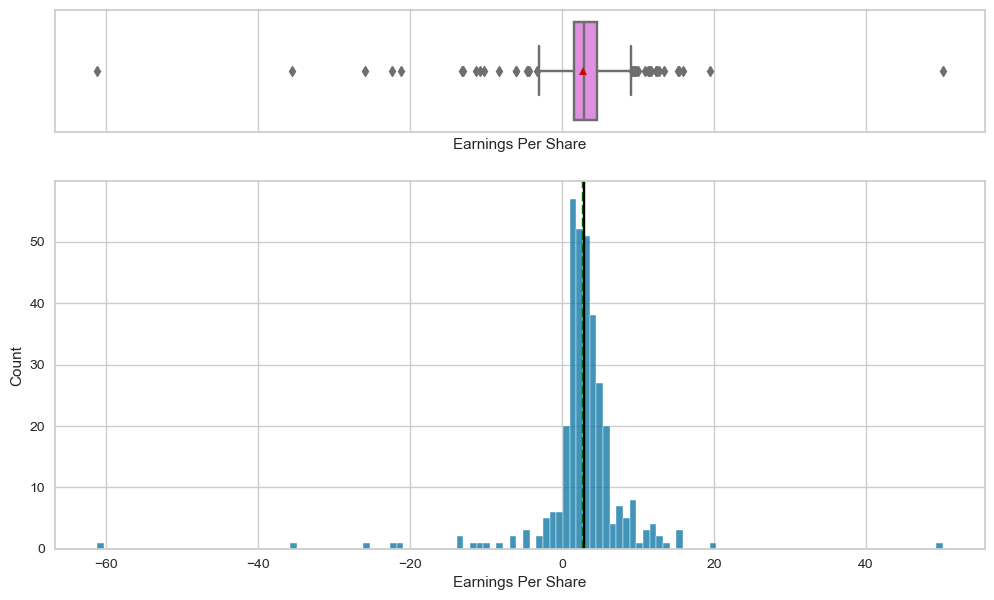

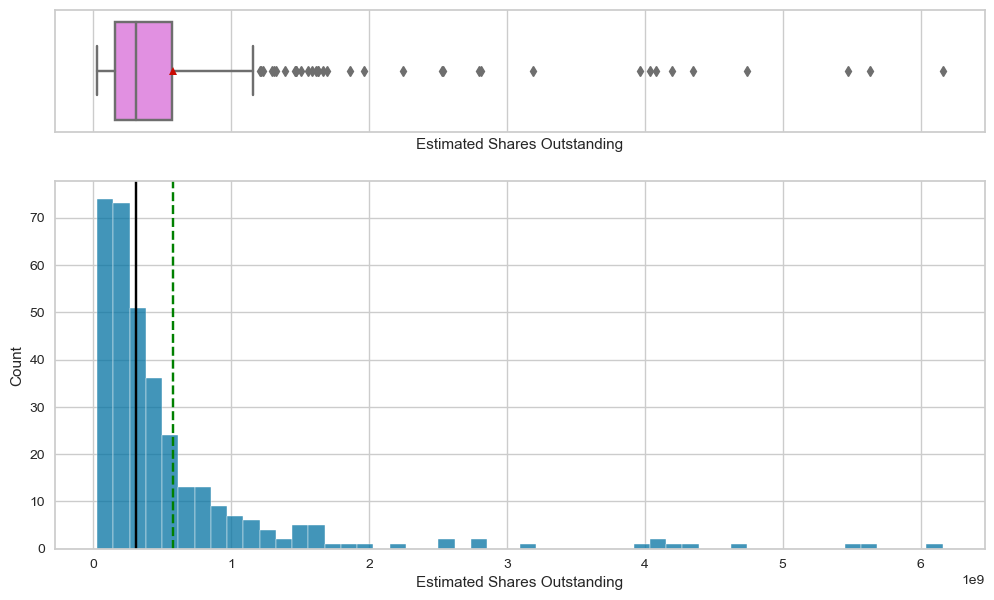

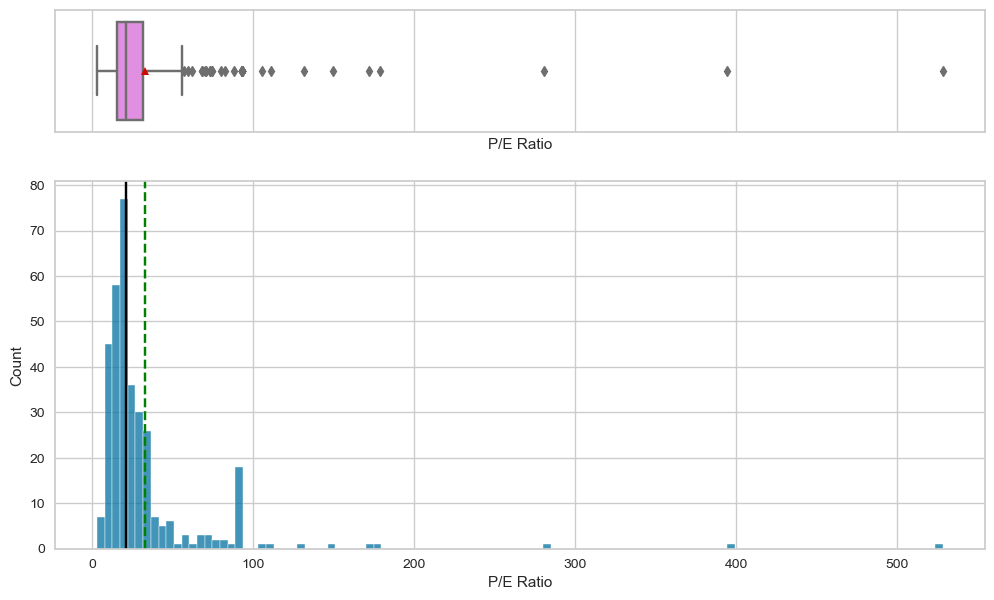

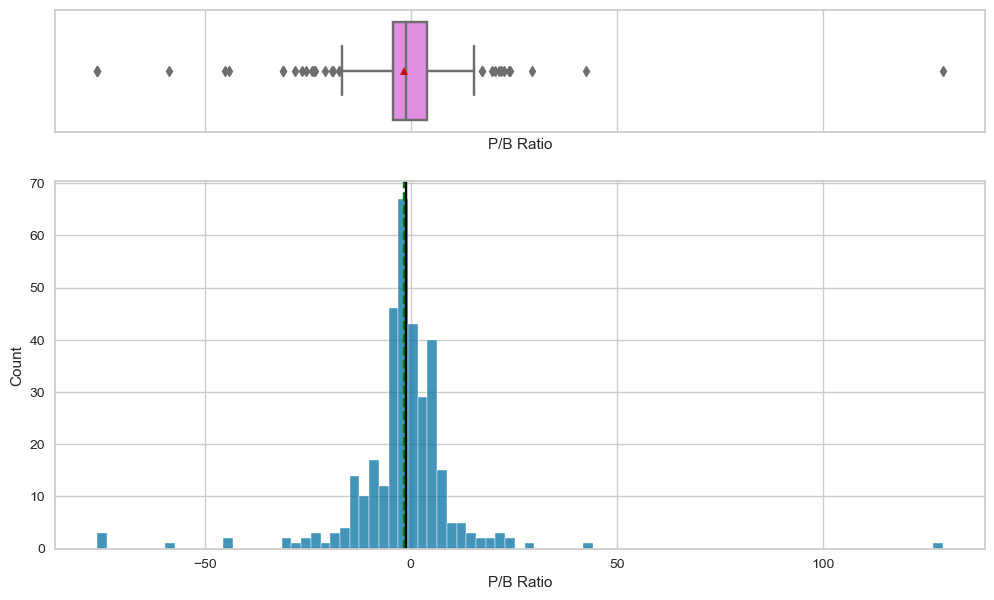

In [12]:
for feature in df.columns[4:]:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)


- Current Price is more left skewed with some outliers.
- Price change is more evenly distributed. 
- Cash Ratio and ROE are also left skewed with some outliers.
- We have outliers in all the categories , we will perform an outlier check and evaluate if we should treat them.

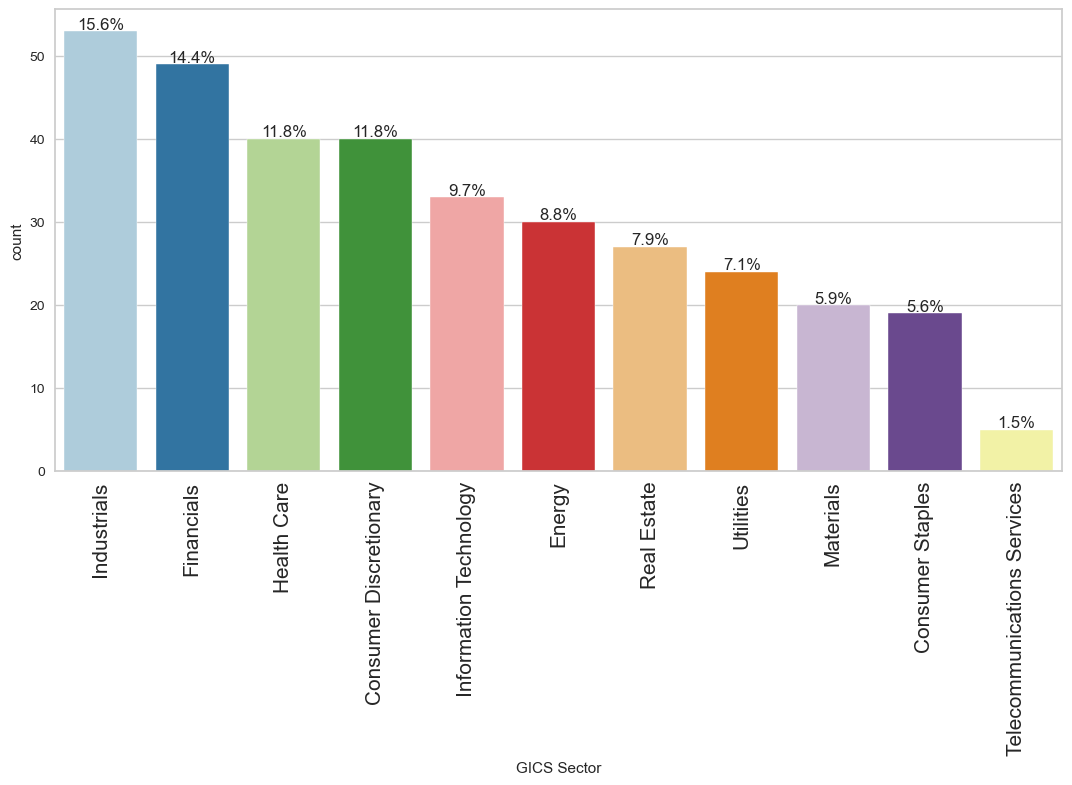

In [13]:
labeled_barplot(df, 'GICS Sector', perc=True)

- Industrials and financials are the top two GISC Sectors.

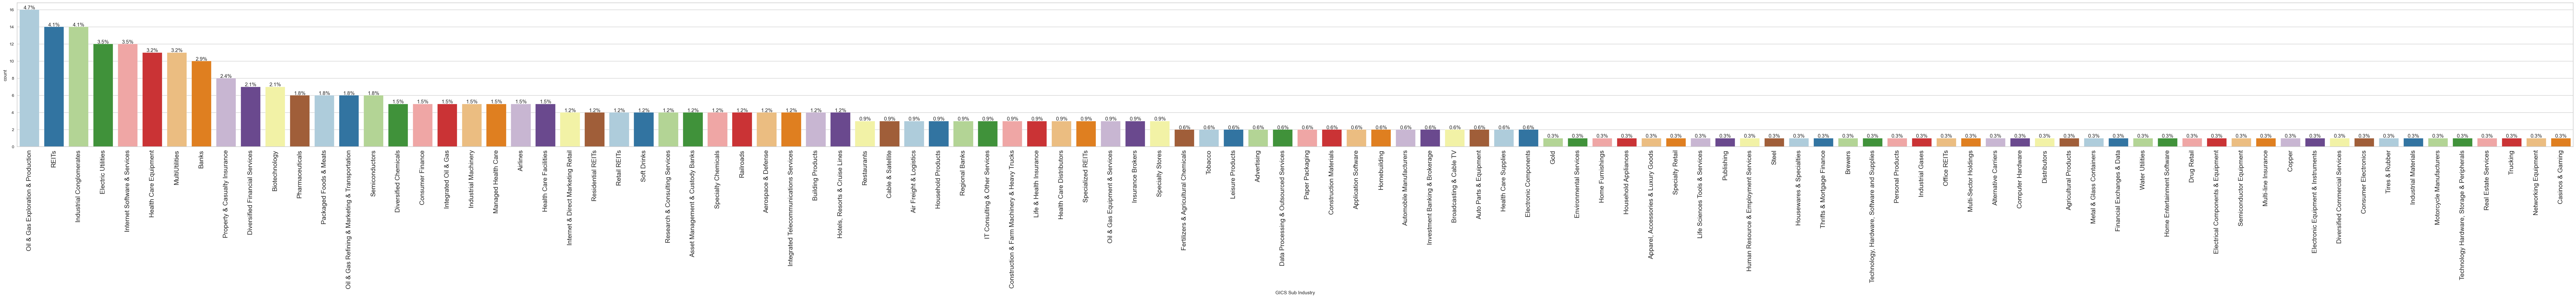

In [14]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

### Bivariate Analysis

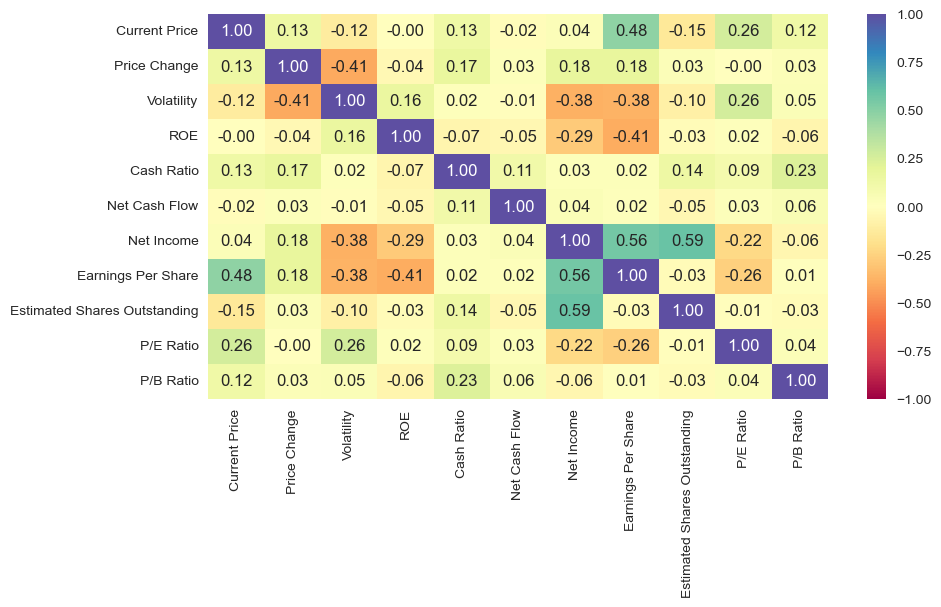

In [15]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
   data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) 
plt.show()

- Current Price and Earnings Per Share have a strong positive correlation of approximately 0.48, suggesting that as the current price increases, earnings per share tends to increase.
- Net Income and Earnings Per Share also exhibit a strong positive correlation of around 0.56, indicating that higher net income corresponds to higher earnings per share.
- Estimated Shares Outstanding and Net Income exhibit a high positive correlation in the provided correlation table, with a coefficient of approximately 0.59. This suggests that as Net Income increases, there is a tendency for the Estimated Shares Outstanding to increase as well.

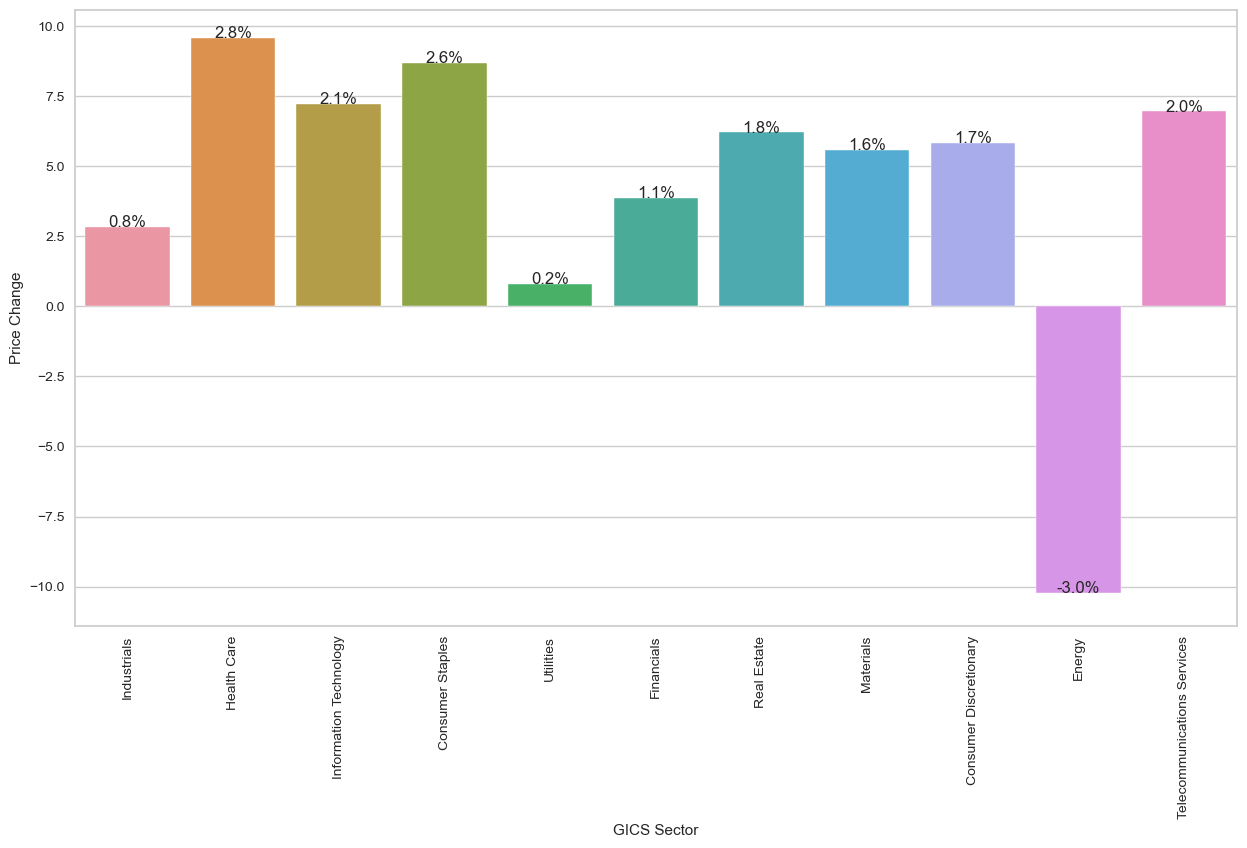

In [16]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, y='Price Change', x='GICS Sector', ci=False)
plt.xticks(rotation=90)

# Calculate the percentages
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center')

plt.show()

- Health care sector has seen the highest price change with 2.8 % followed by consumer staples.

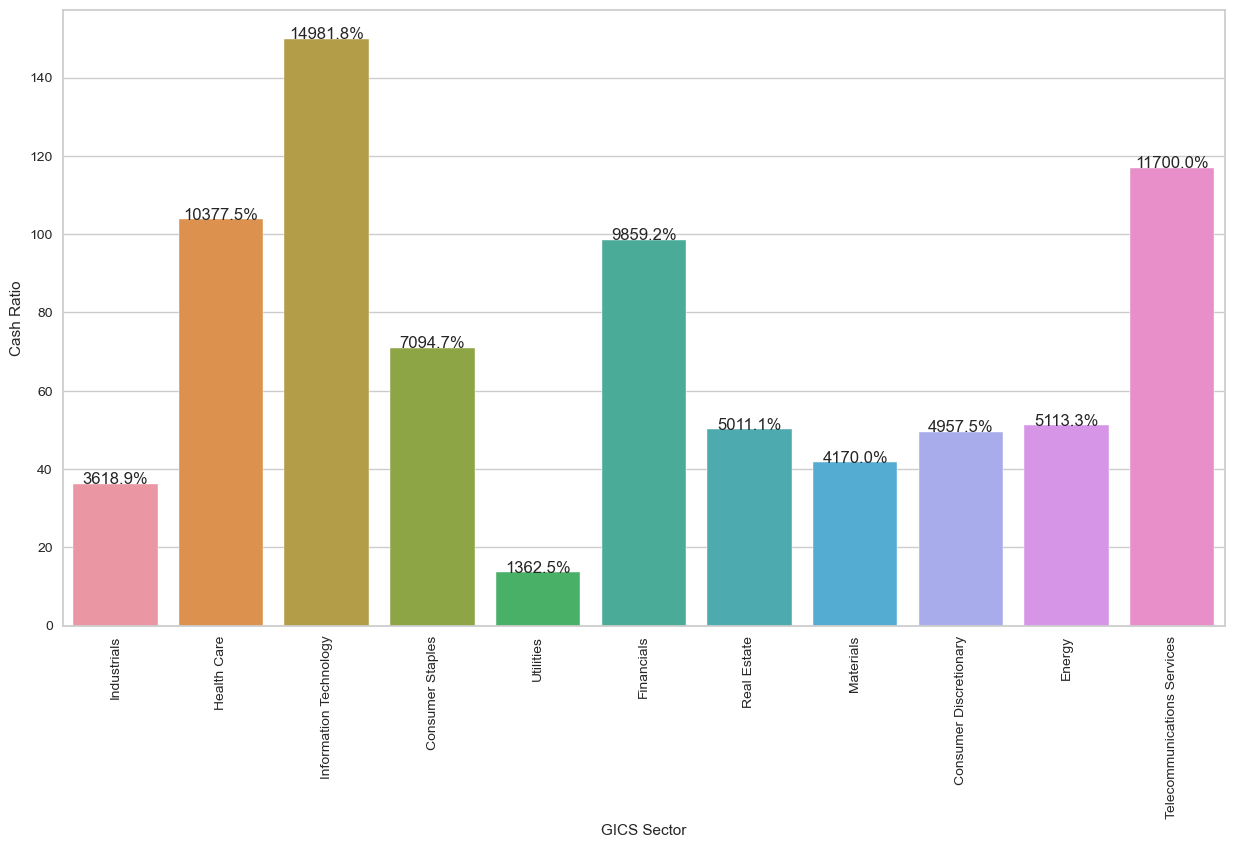

In [17]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, y='Cash Ratio', x='GICS Sector', ci=False)
plt.xticks(rotation=90)

# Calculate the percentages
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center')

plt.show()

- Information Technology has the highest average cash ratio, indicating that, on average, companies in this sector have a relatively high level of cash and cash equivalents to cover their short-term obligations.

- Healthcare follows Information Technology, with the second-highest average cash ratio. Companies in the healthcare sector also tend to have a relatively strong ability to meet their short-term obligations using cash resources.

- Financials is in the third position in terms of the average cash ratio. While it's lower than the top two sectors, companies in the financial sector still maintain a reasonable level of cash to cover short-term obligations.

- Consumer Staples comes fourth in the ranking. Companies in this sector have a moderate average cash ratio, suggesting a moderate ability to cover short-term obligations with cash.

- Utilities is at the bottom of the list. This sector has the lowest average cash ratio among the listed sectors, indicating that, on average, companies in the utilities sector may have less liquidity to meet short-term financial obligations.

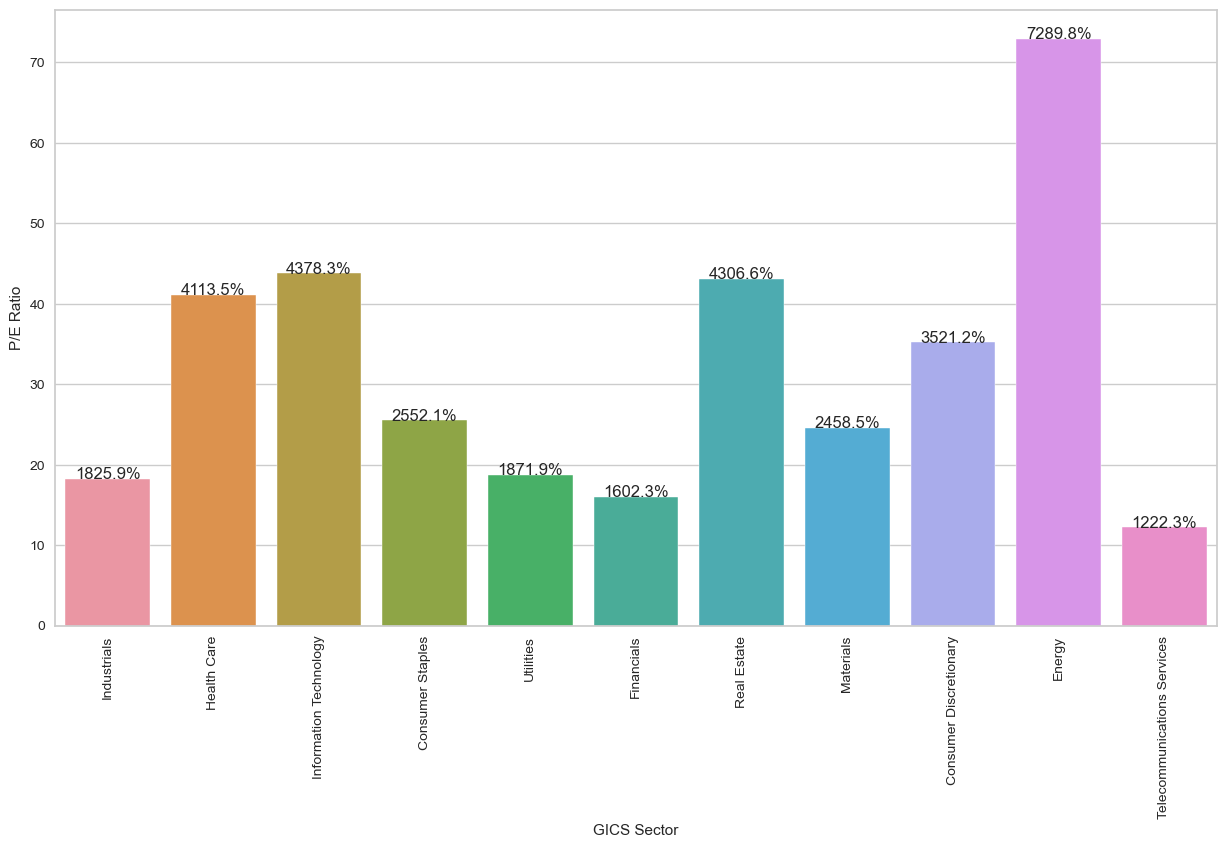

In [18]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, y='P/E Ratio', x='GICS Sector', ci=False)
plt.xticks(rotation=90)

# Calculate the percentages
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center')

plt.show()

- Energy: The energy sector has the highest average P/E ratio. This indicates that, on average, investors are willing to invest a higher amount for a single share of an energy company relative to its earnings.

- Healthcare, Information Technology, and Real Estate: These sectors have similar and moderate average P/E ratios. Investors, on average, are willing to invest a moderate amount for a single share in companies within these sectors in relation to their earnings.

- Telecommunication Services: The telecommunication services sector has the lowest average P/E ratio. This suggests that investors are generally more conservative in their valuations of companies in this sector and are willing to invest less for a single share relative to earnings.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

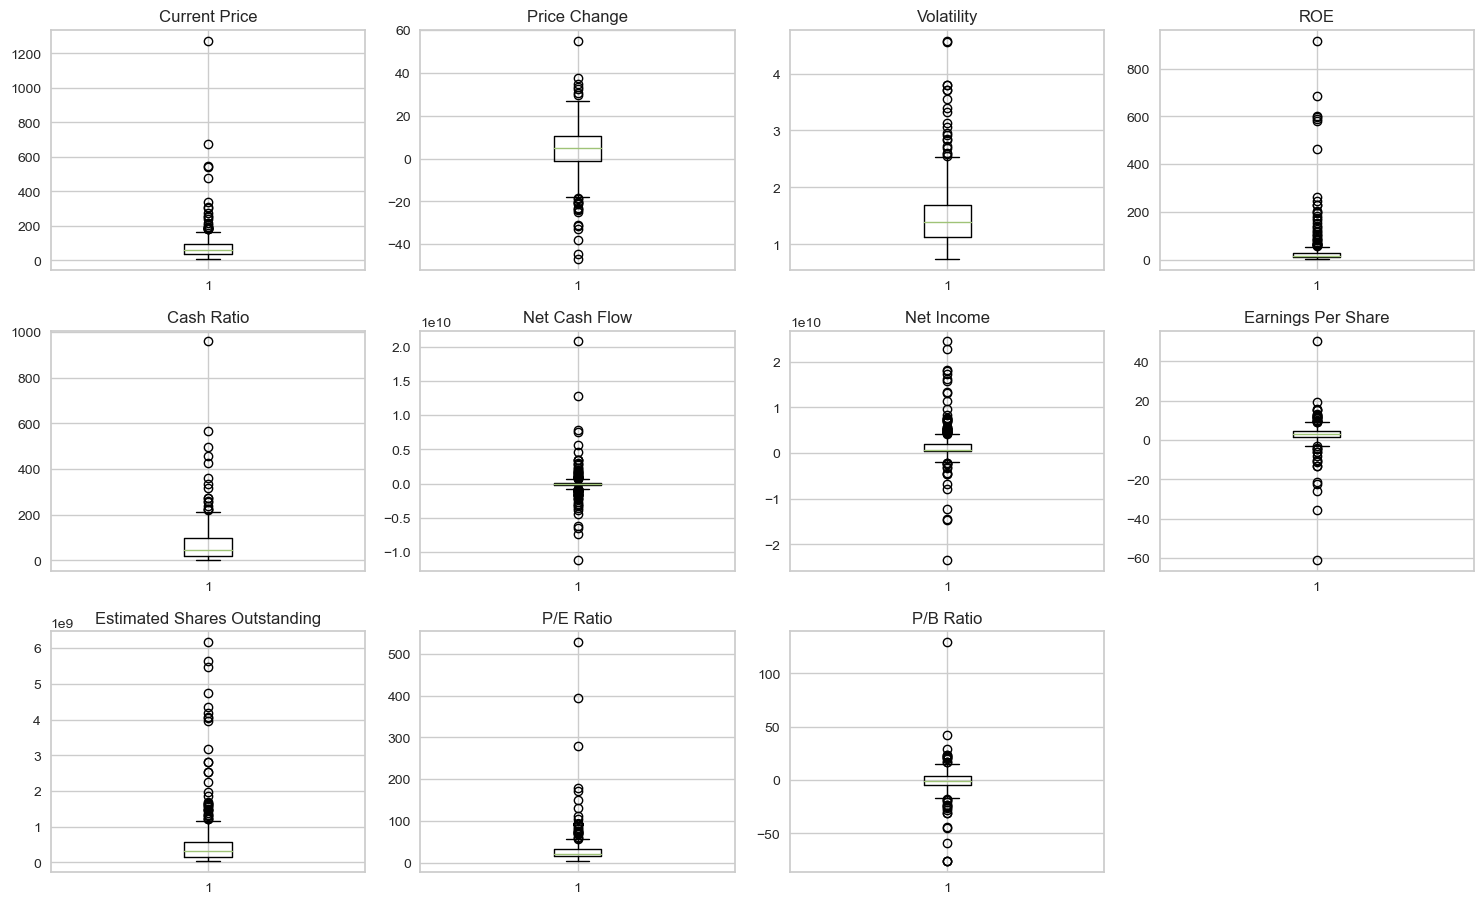

In [19]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

In [20]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [21]:
num_col = [
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/E Ratio",
    "P/B Ratio",
]

In [22]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled= scaler.fit_transform(subset)

In [23]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [24]:
subset_scaled_df.head() 

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## EDA

- It is a good idea to explore the data once again after manipulating it.

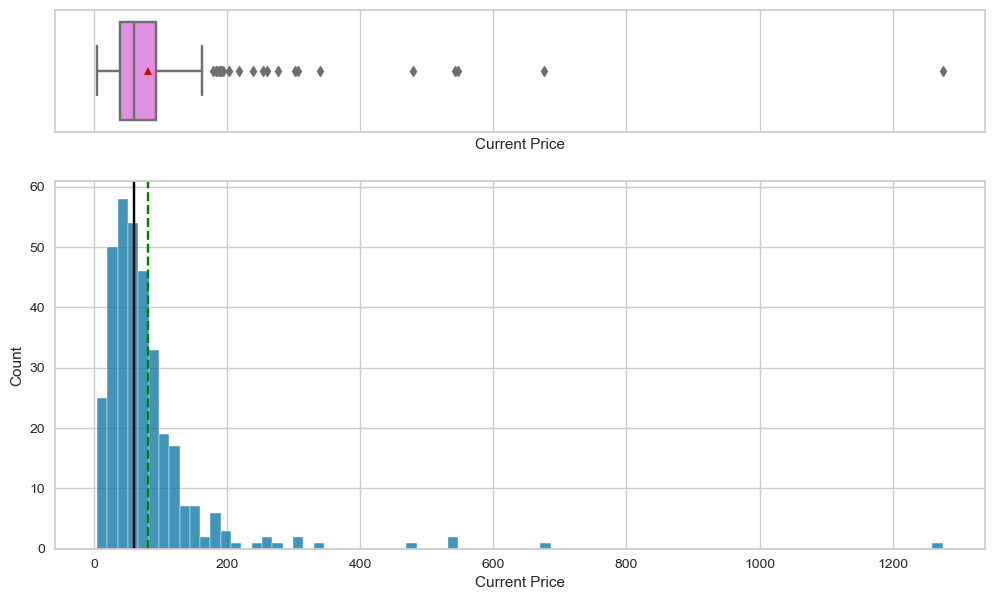

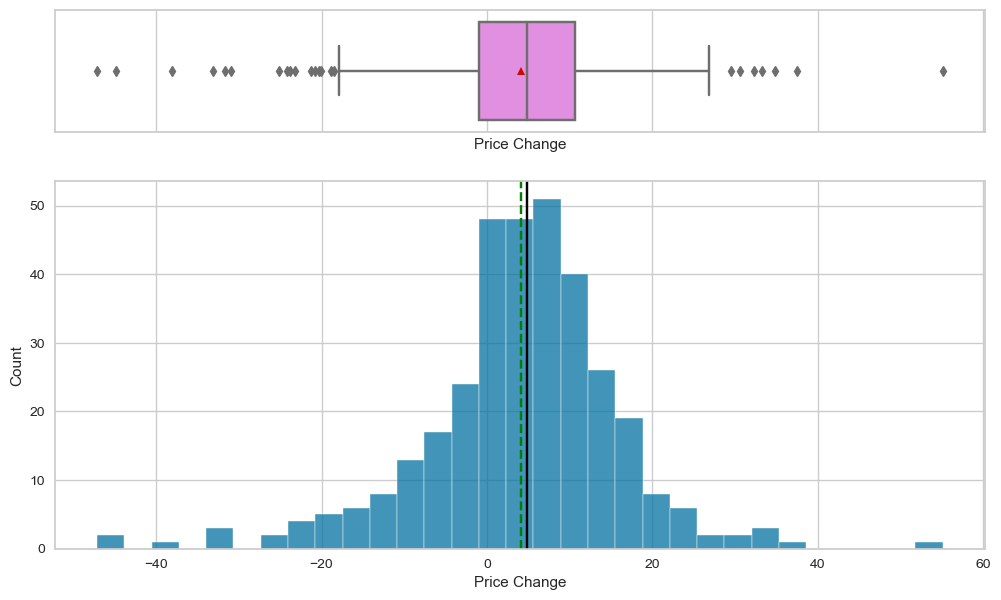

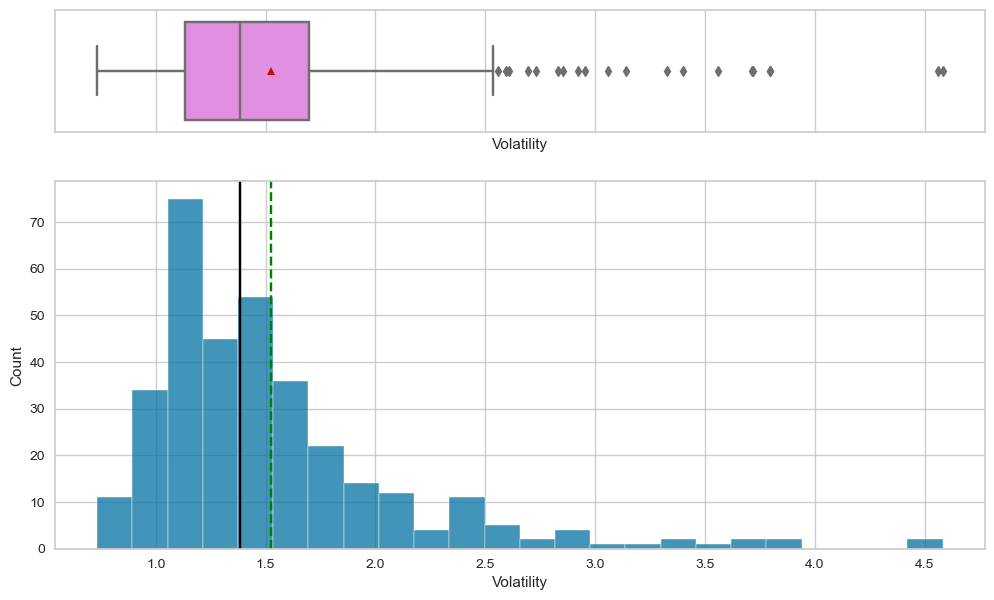

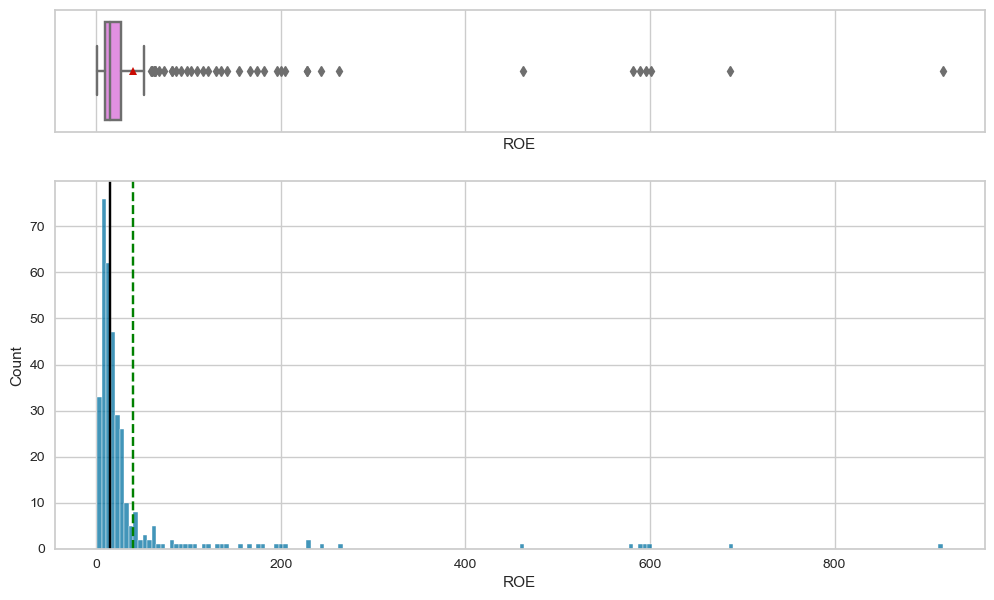

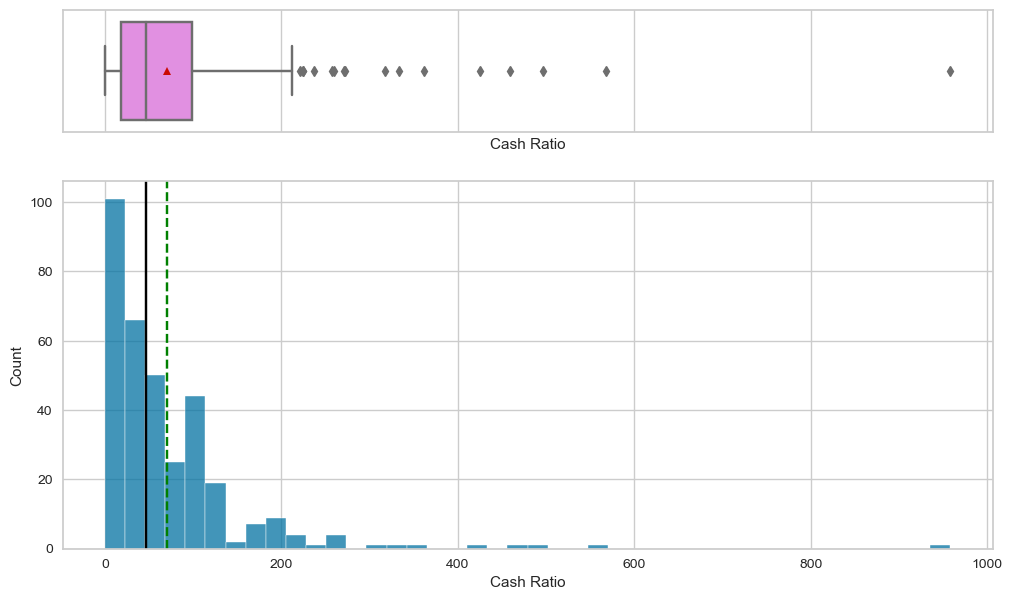

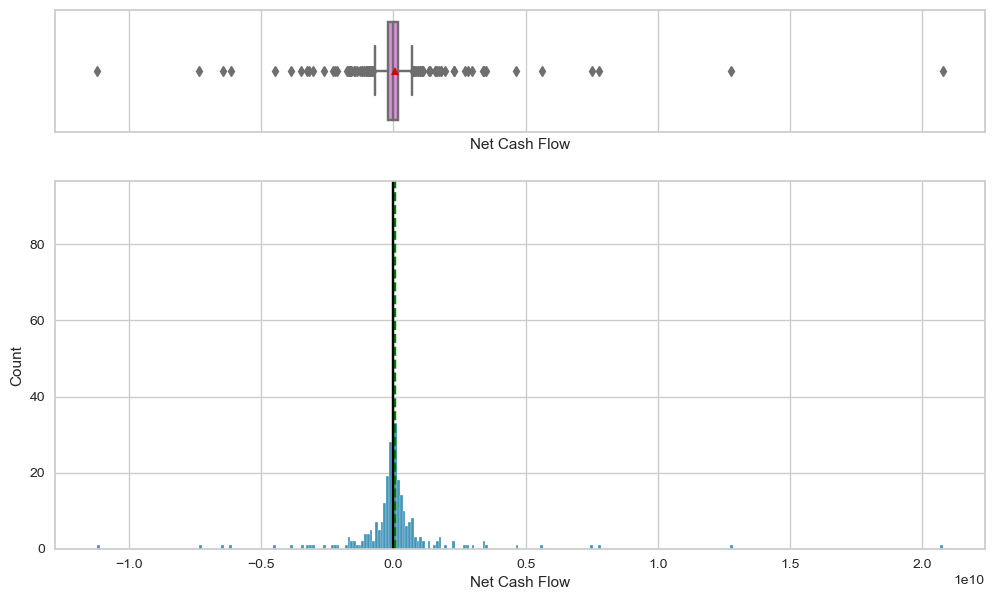

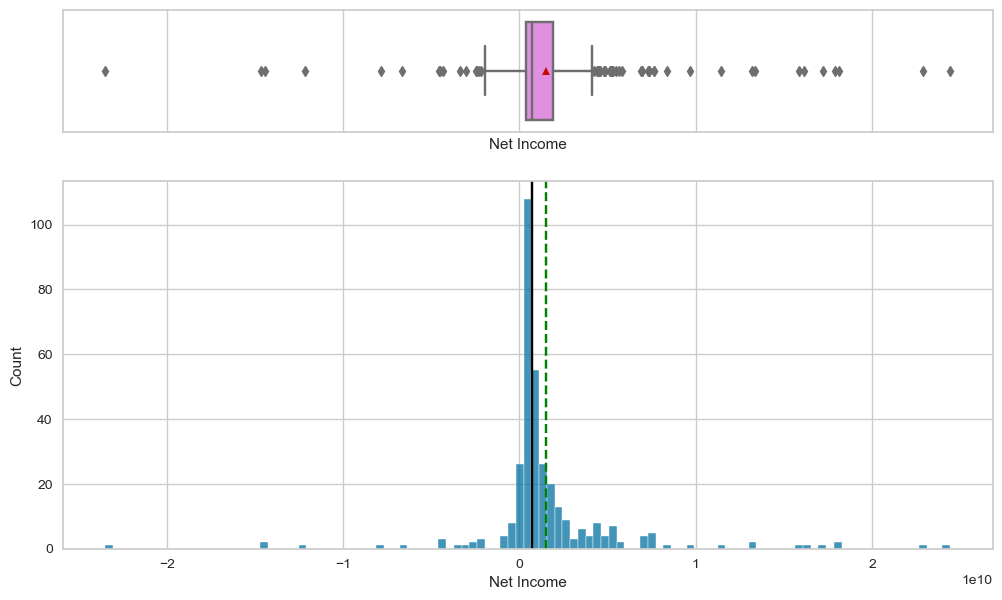

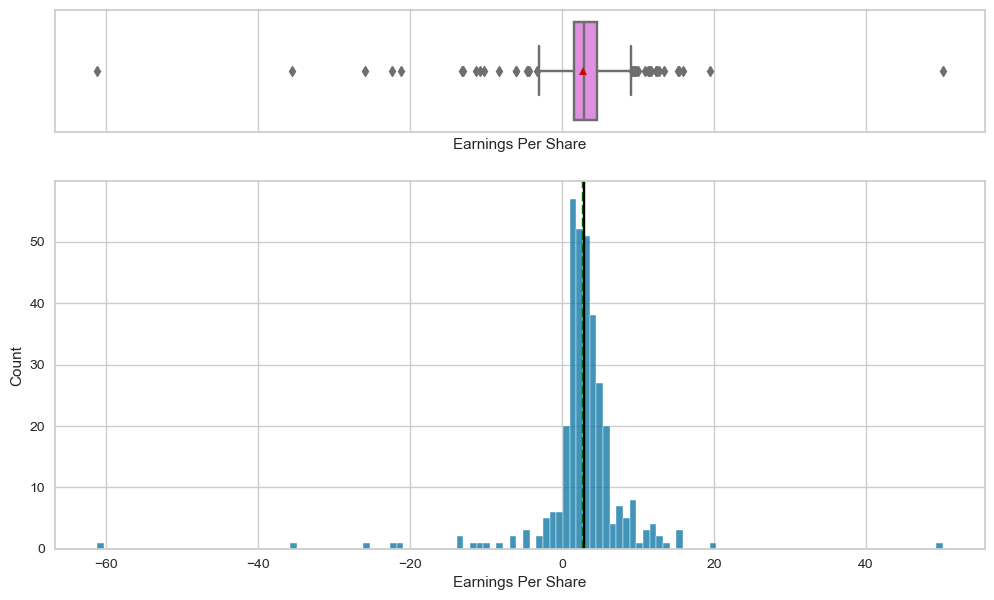

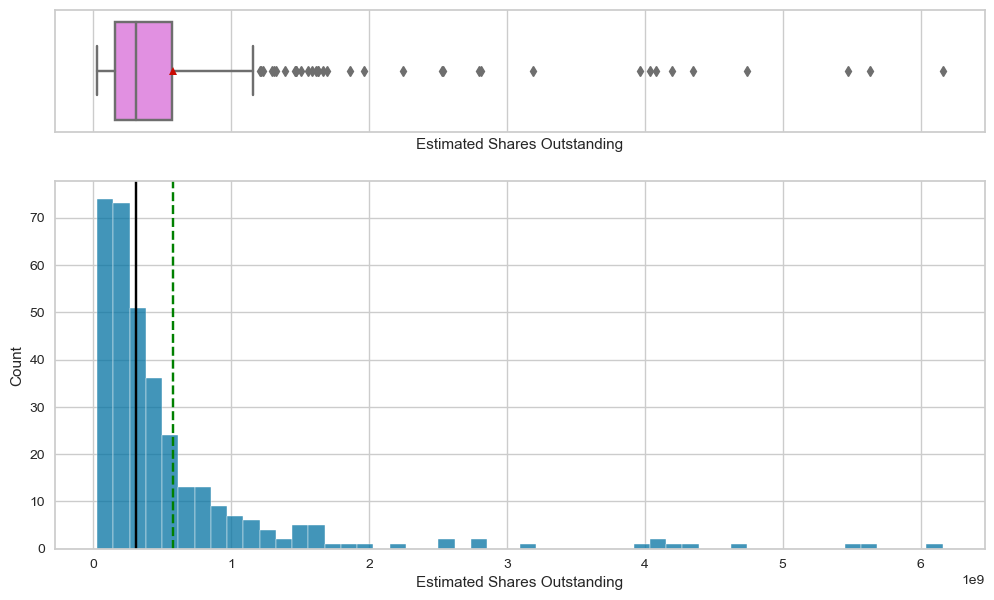

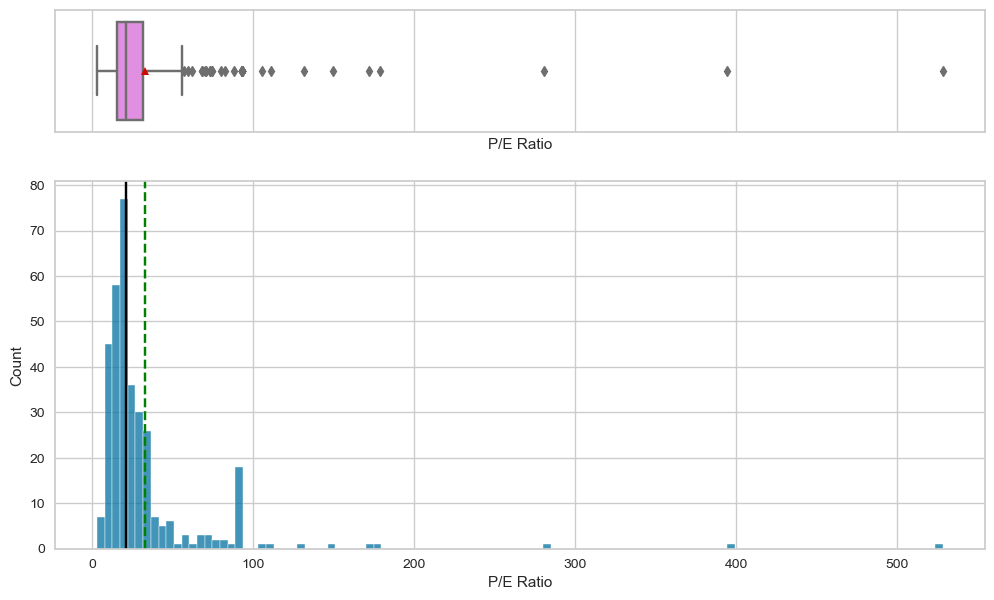

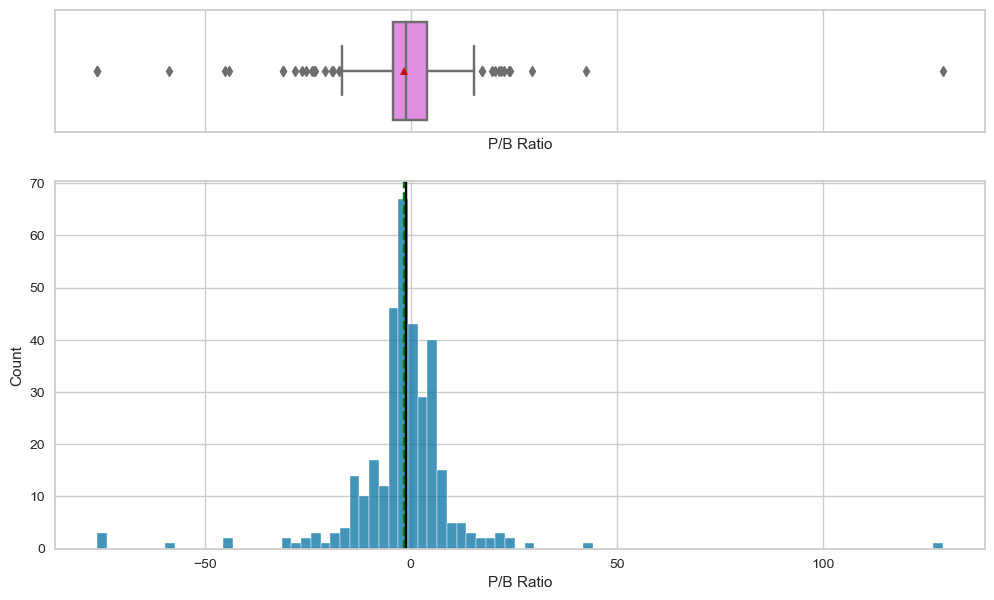

In [25]:
for feature in df.columns[4:]:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

## K-means Clustering

In [26]:
df_kmeans=subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683105560042285
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.1225218310422096
Number of Clusters: 6 	Average Distortion: 2.069777989444579
Number of Clusters: 7 	Average Distortion: 2.020449675783263
Number of Clusters: 8 	Average Distortion: 1.9803301883987712


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

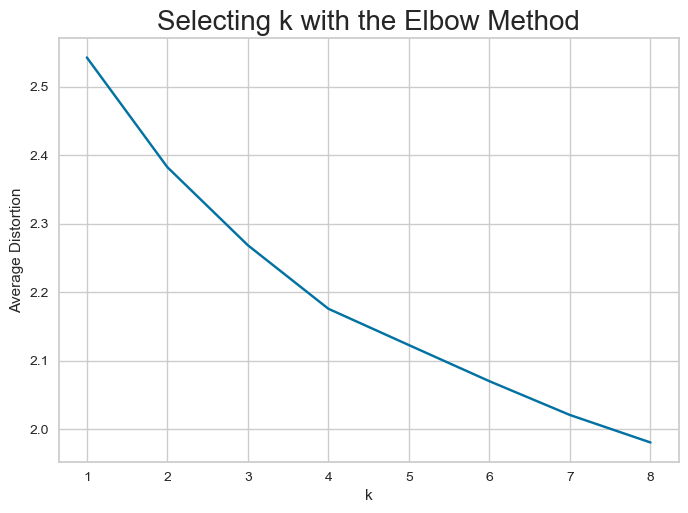

In [27]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_kmeans)
    prediction = model.predict(df_kmeans)
    distortion = (
        sum(
            np.min(cdist(df_kmeans, model.cluster_centers_, "euclidean"), axis=1)
        )
        / df_kmeans.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 4 or 5.**

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45797710447228496
For n_clusters = 4, silhouette score is 0.42754219228546586
For n_clusters = 5, silhouette score is 0.40592201362370645
For n_clusters = 6, silhouette score is 0.38768555359623835
For n_clusters = 7, silhouette score is 0.42684782431135787
For n_clusters = 8, silhouette score is 0.40744438179297693
For n_clusters = 9, silhouette score is 0.16122098633764617


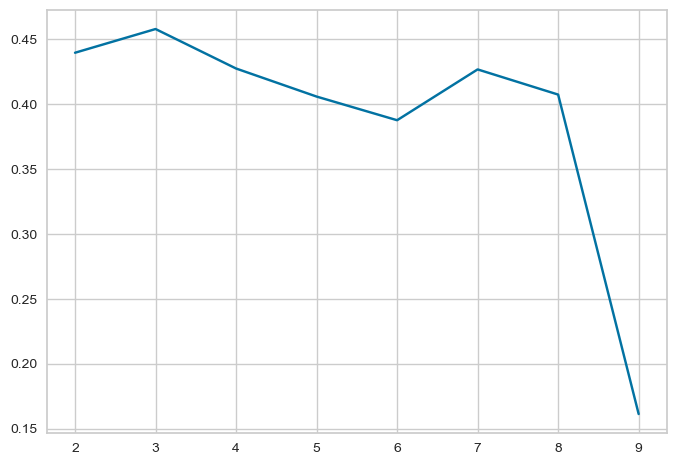

In [28]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_kmeans))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_kmeans, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 3 or 4 is a good value of k.**

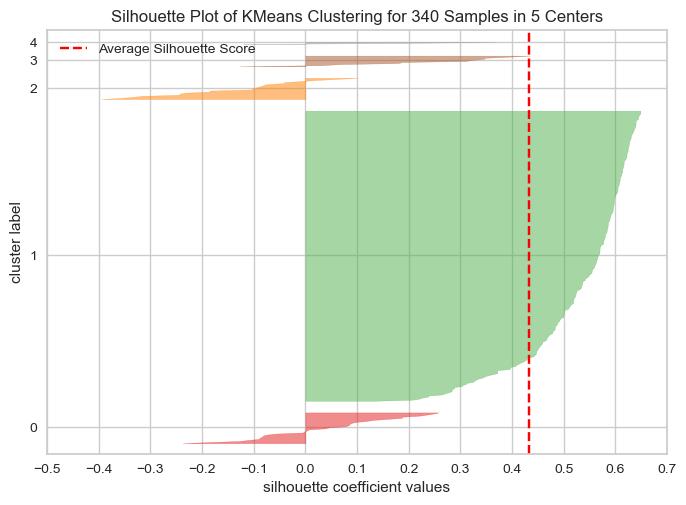

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df_kmeans)
visualizer.show()

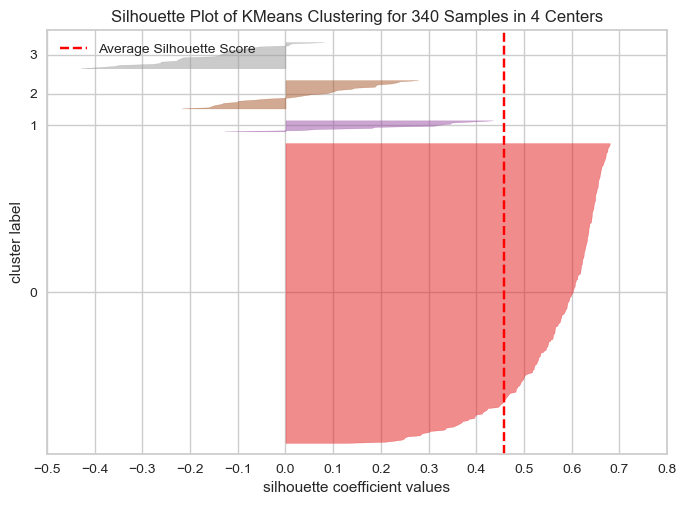

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_kmeans)
visualizer.show()

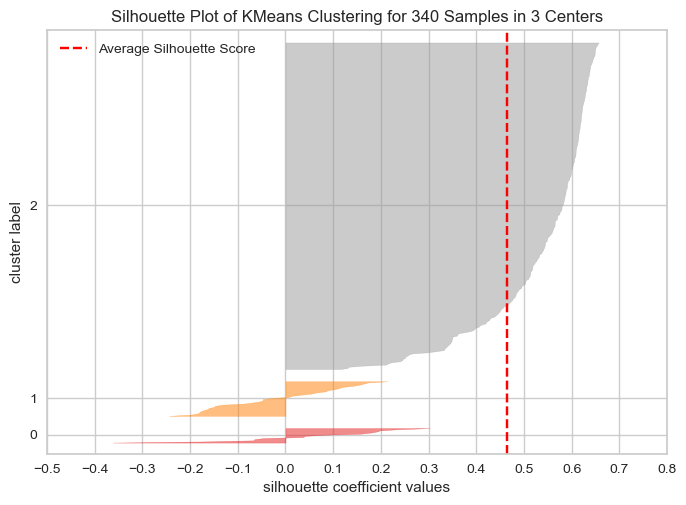

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_kmeans)
visualizer.show()

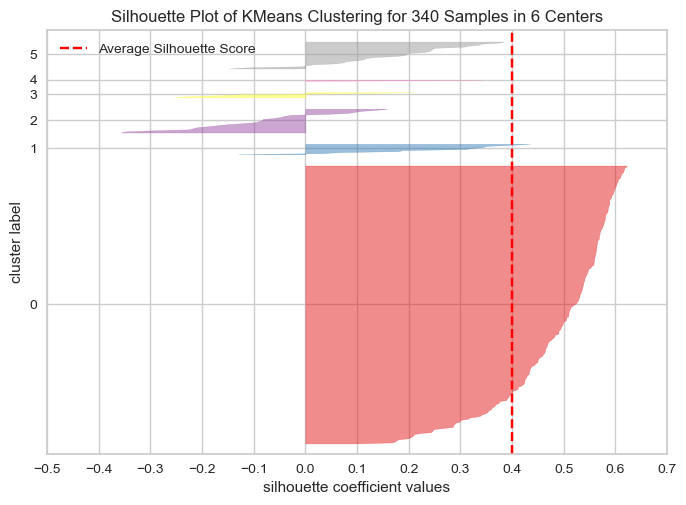

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(df_kmeans)
visualizer.show()

**Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 4 in the elbow curve.**

In [33]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_kmeans)

KMeans(n_clusters=4, random_state=0)

In [34]:
# adding kmeans cluster labels to the original dataframe
df1=df.copy()
df1["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [35]:
cluster_profile = df1.groupby("K_means_segments").mean()

In [36]:
cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Security"].count().values
)

In [37]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


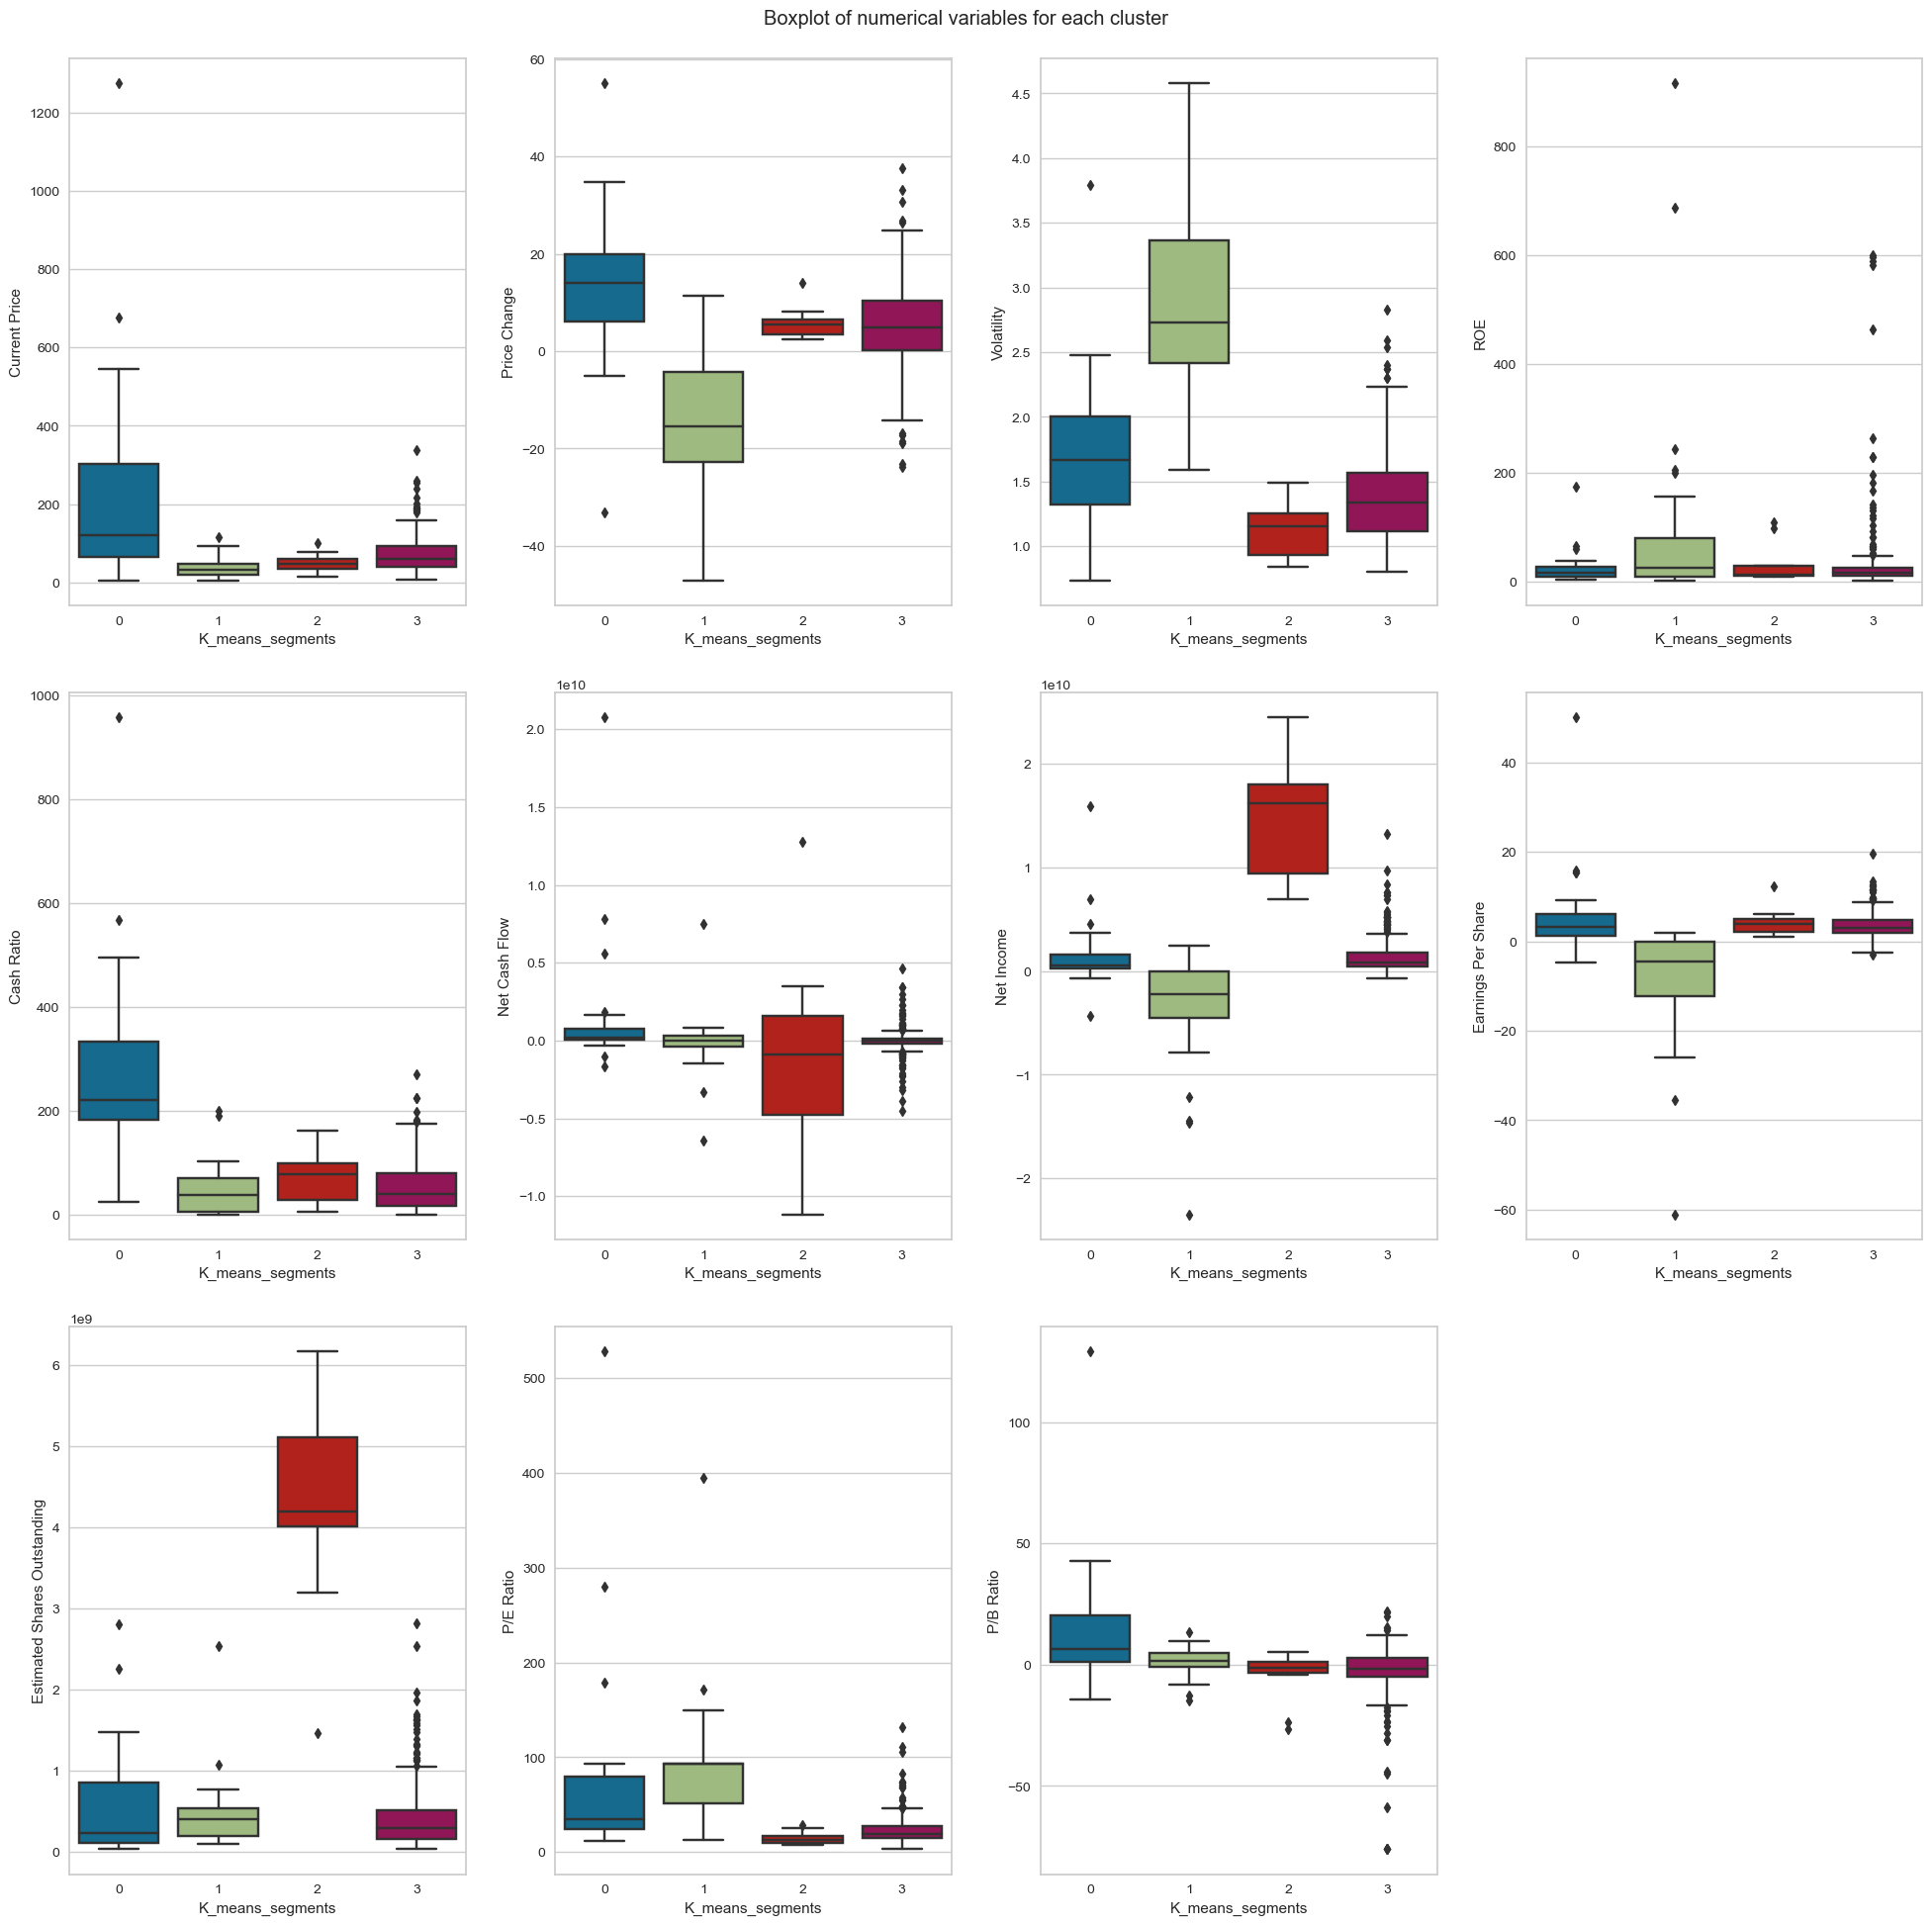

In [38]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

In [39]:
df1.groupby("K_means_segments")["GICS Sector"].count()

K_means_segments
0     25
1     27
2     11
3    277
Name: GICS Sector, dtype: int64

Cluster 0:

- This cluster is characterized by high current stock prices, indicating potentially premium stocks.
- Positive price changes suggest a general upward trend in these stocks.
- Moderate volatility implies relatively stable price movements.
- The return on equity (ROE) is decent at 25.60%, indicating a reasonable level of profitability.
- High cash ratios and positive net cash flow suggest that these companies have substantial liquidity.
- The P/E ratio of 74.96 and P/B ratio of 14.40 indicate that these stocks may be trading at a premium in comparison to their book value.

Cluster 1:

- Stocks in this cluster have relatively low current prices, suggesting they may be undervalued.
- Negative price changes and high volatility indicate that these stocks have experienced significant price fluctuations, potentially presenting higher risk.
- The extremely high ROE (107.07%) suggests outstanding profitability in this cluster, albeit with significant variability.
- Moderate cash ratios and negative net cash flow raise liquidity concerns.
- A very high P/E ratio (90.62) indicates that investors are willing to pay a premium for these stocks, likely due to high expected earnings.

Cluster 2:

- These stocks have moderate current prices and positive price changes, indicating a stable market performance.
- Low volatility suggests relatively steady price movements.
- A good ROE (31.09%) indicates reasonable profitability.
- High cash ratios and negative net cash flow may indicate conservative financial management.
- The P/B ratio of -4.55 implies that these stocks may be trading below their book value, potentially making them value investments.

Cluster 3:

- Stocks in this cluster have moderate current prices and positive price changes.
- Moderate volatility suggests relatively steady price movements.
- A good ROE (34.62%) indicates reasonable profitability.
- Moderate cash ratios and negative net cash flow suggest some liquidity challenges.
- The P/E ratio of 23.84 and a negative P/B ratio (-3.36) indicate that these stocks might be trading at a reasonable valuation.

## Hierarchical Clustering

In [40]:
df_hc=subset_scaled_df.copy()

In [41]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

In [42]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [43]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [44]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


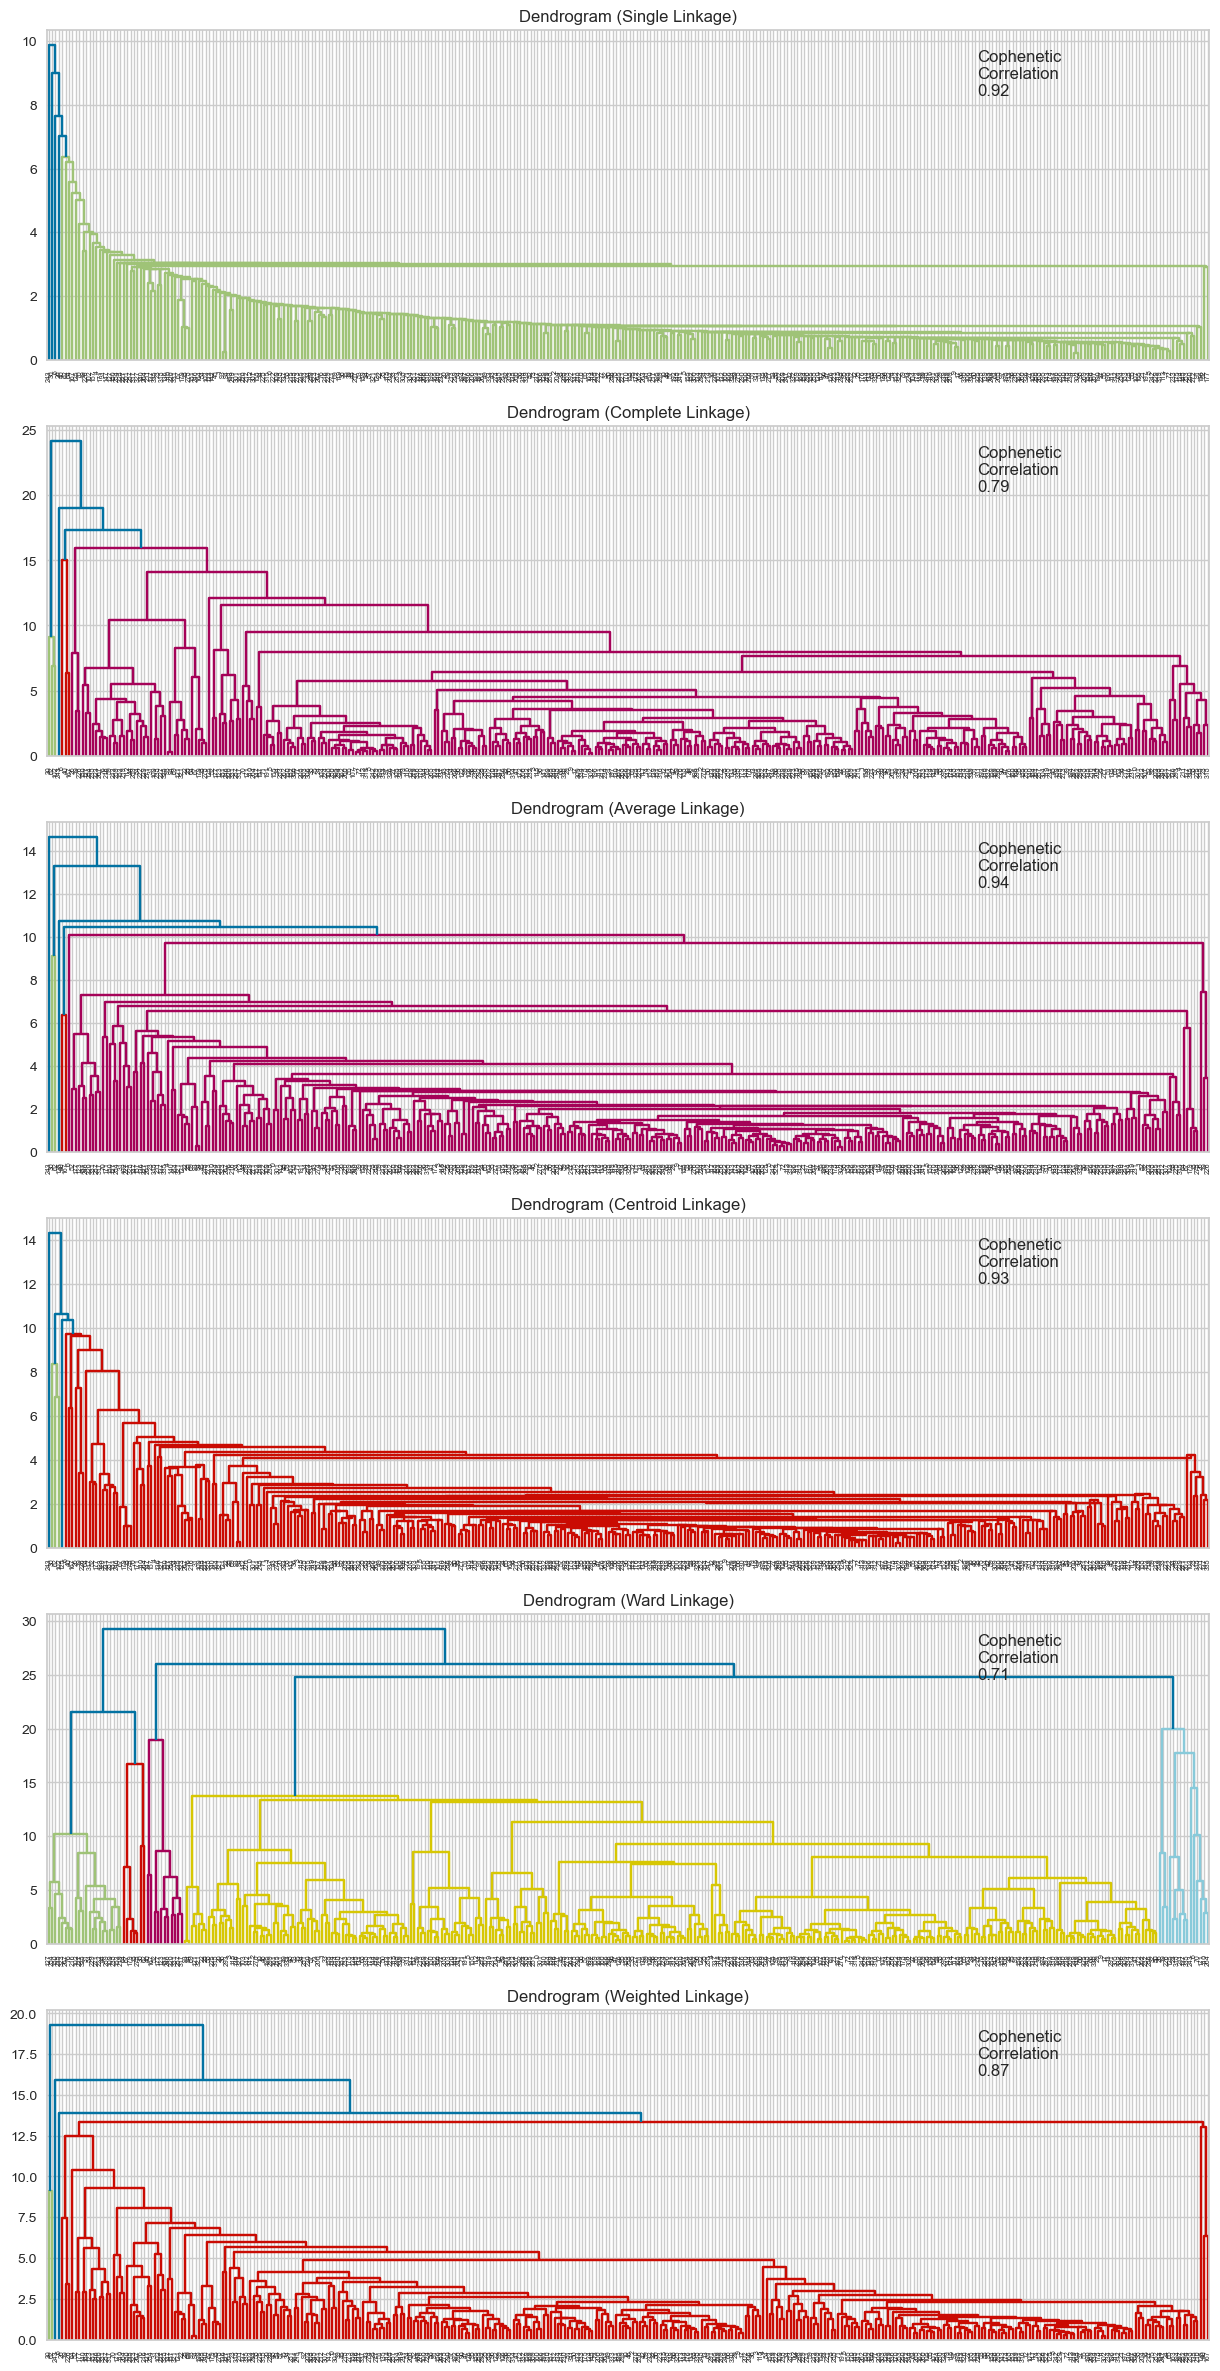

In [45]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average linkage methods.
- We will move ahead with average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model using sklearn

In [46]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(df_hc)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [47]:
df2=df.copy()
df2["HC_clusters"] = HCmodel.labels_

In [48]:
df2.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_clusters
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,0


## Cluster Profiling

In [49]:
cluster_profile = df2.groupby("HC_clusters").mean()

In [50]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_clusters")["Security"].count().values
)

In [51]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_clusters,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


In [52]:
# let's see the names of the countries in each cluster
for cl in df2["HC_clusters"].unique():
    print("In cluster {}, the following groups are present:".format(cl))
    print(df2[df2["HC_clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following groups are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Cor

In [53]:
df2.groupby("HC_clusters")["GICS Sector"].count()

HC_clusters
0    333
1      2
2      2
3      1
4      1
5      1
Name: GICS Sector, dtype: int64

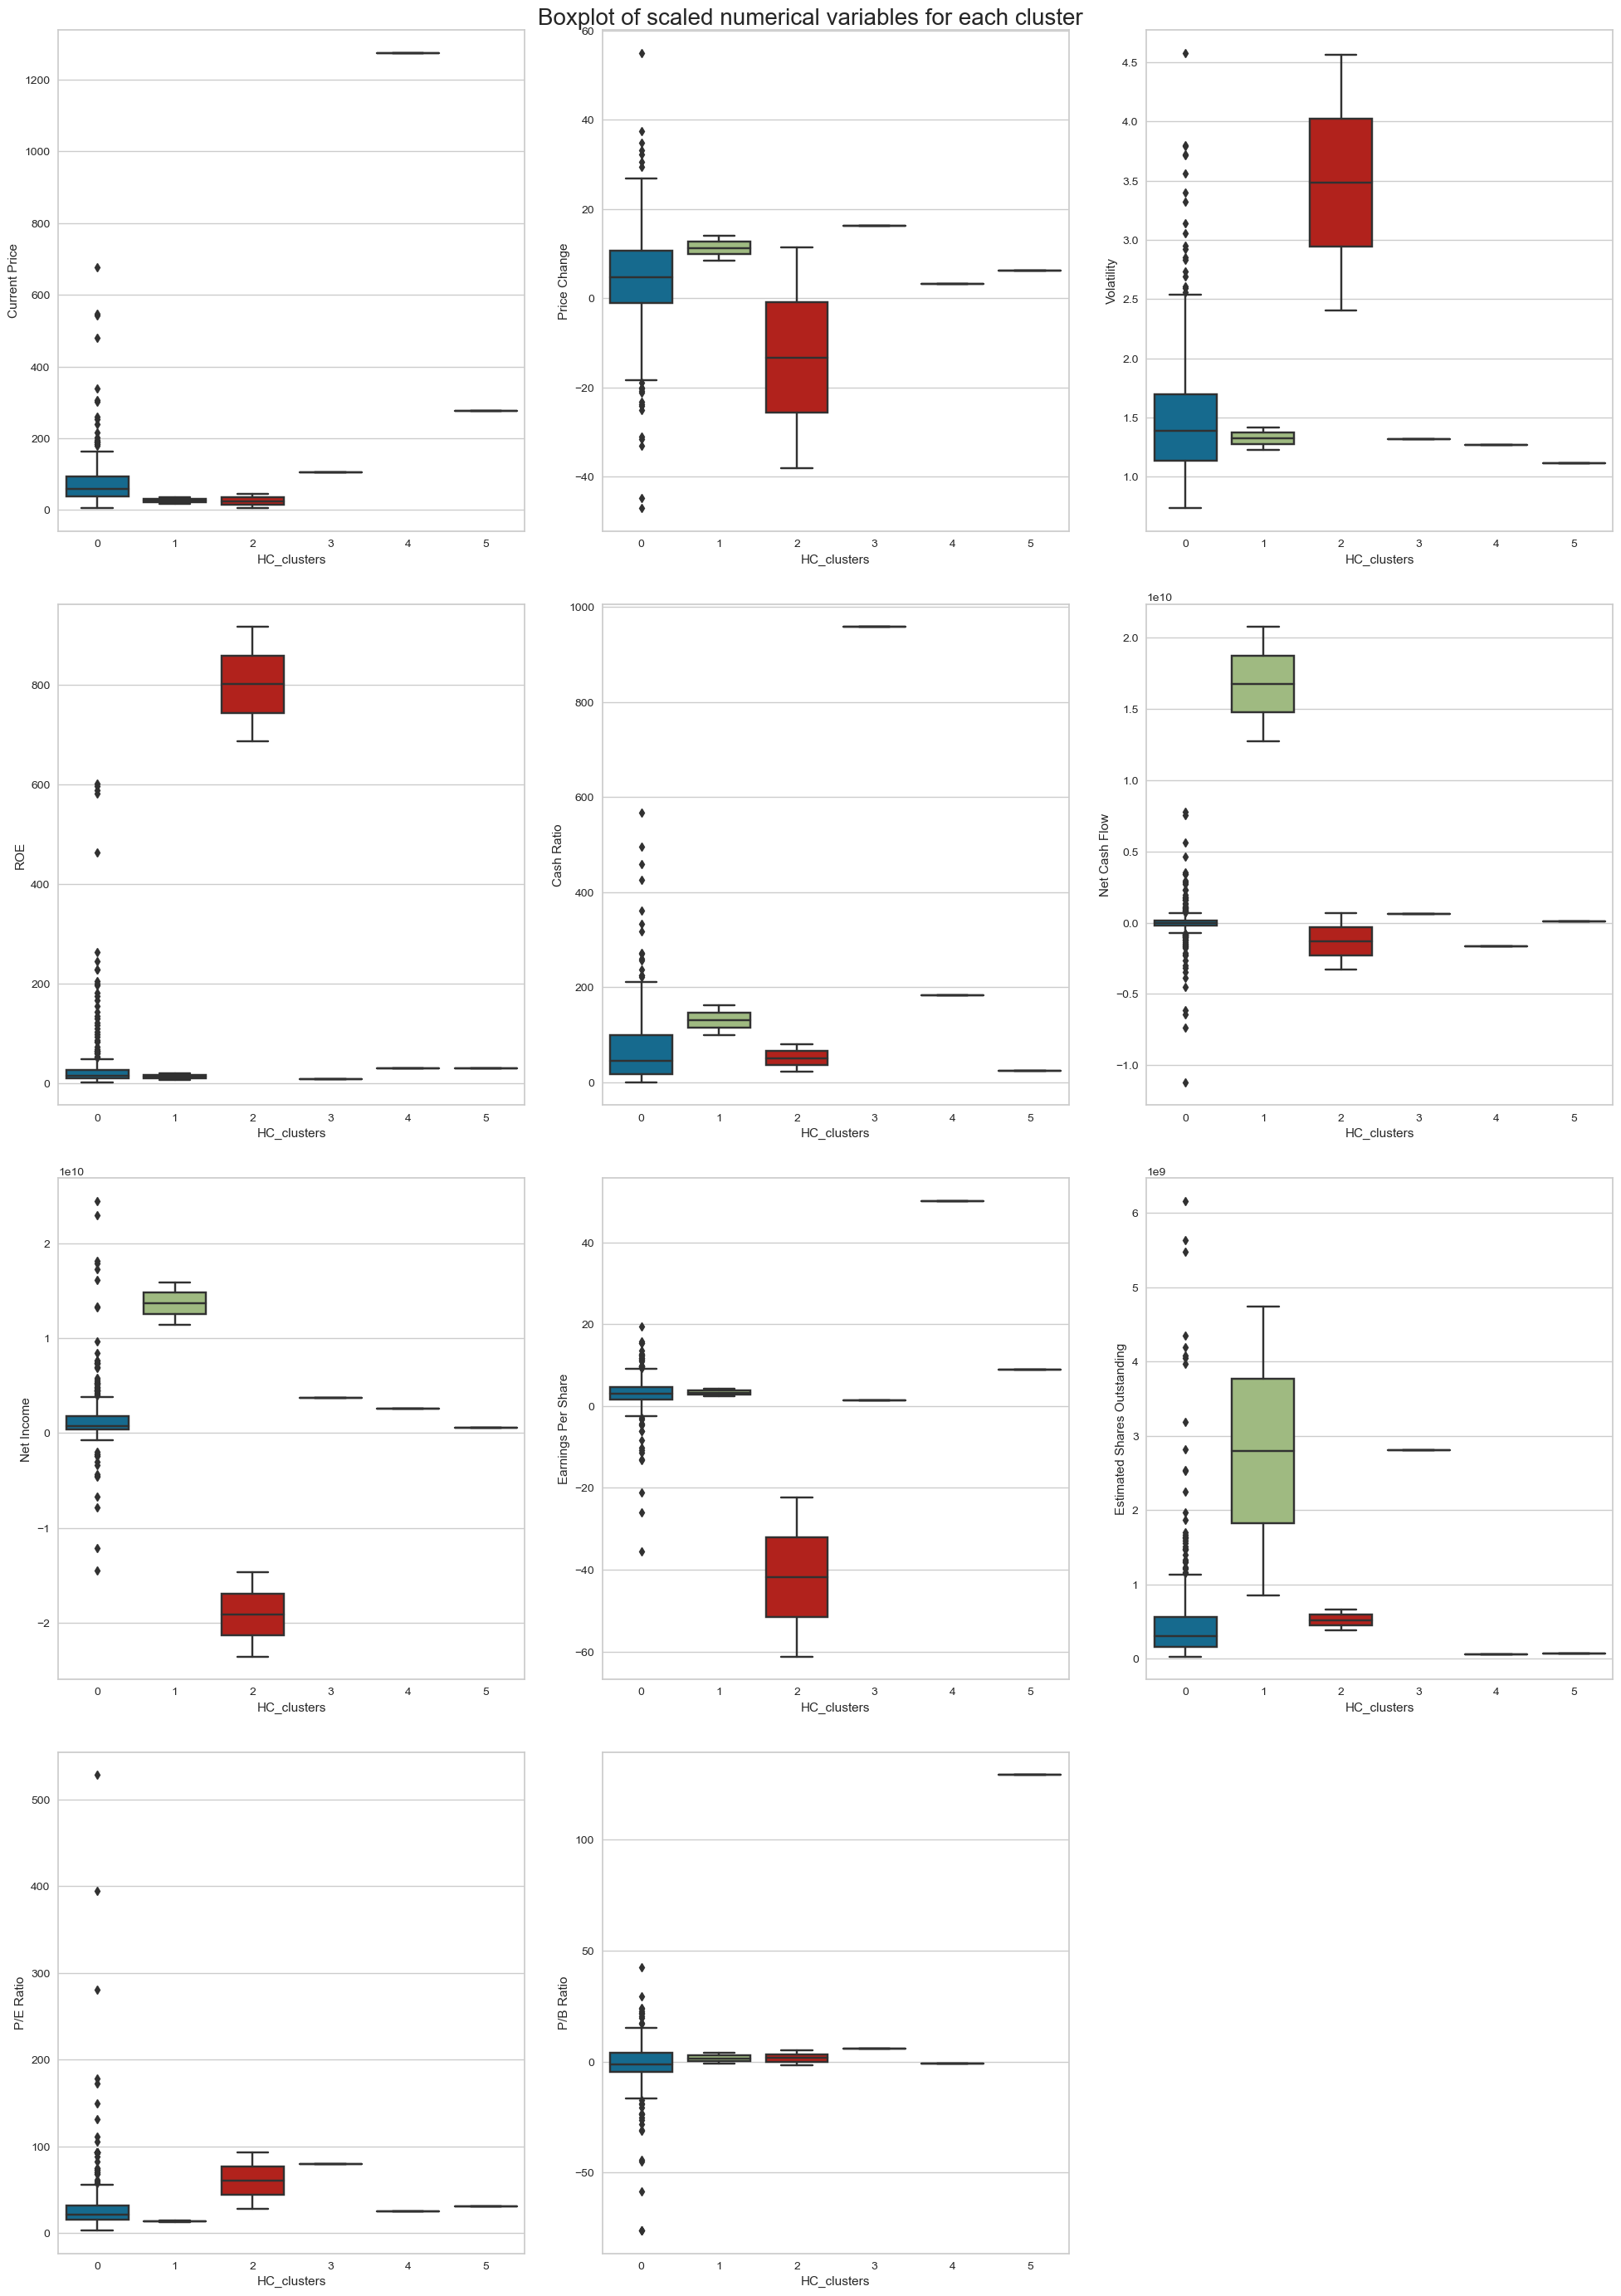

In [54]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df2, x="HC_clusters", y=variable)

plt.tight_layout(pad=2.0)

Cluster 0:

- Moderate current price and volatility; strong cash ratio; positive earnings; high estimated shares outstanding; moderate P/E and negative P/B ratios; a relatively large cluster.

Cluster 1:

- Low current price; high price change; moderate volatility; modest ROE; substantial cash; positive earnings; low P/E and P/B ratios; a small cluster.

Cluster 2:

- Low current price; significant price change; high volatility; exceptionally high ROE; moderate cash; negative earnings; negative P/B ratio; a small cluster.

Cluster 3:

- Moderate current price and volatility; low ROE; high cash; positive earnings; moderate P/E and P/B ratios; a small cluster.

Cluster 4:

- High current price; positive price change; low volatility; moderate ROE; high cash; negative earnings; moderate P/E and negative P/B ratio; a single stock cluster.

Cluster 5:

- High current price; positive price change; low volatility; moderate ROE; low cash; positive earnings; high P/E and P/B ratios; a single stock cluster.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- K-means took less time for execution compared to the Hierarchical Clustering technique. K-means is generally faster, especially for larger datasets, as it directly assigns each data point to the nearest centroid.
- K-means generated more distinct clusters compared to the Hierarchical Clustering technique. K-means explicitly assigns each data point to one of 'k' clusters, resulting in more clearly defined clusters. In contrast, Hierarchical Clustering creates a hierarchical tree of clusters, and the number of clusters may not be as explicitly determined.


In [55]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(df_kmeans)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [56]:
pca.explained_variance_ratio_.sum()

0.37128995677258525

- The first two principal components explain 37.12% of the variance in the data.

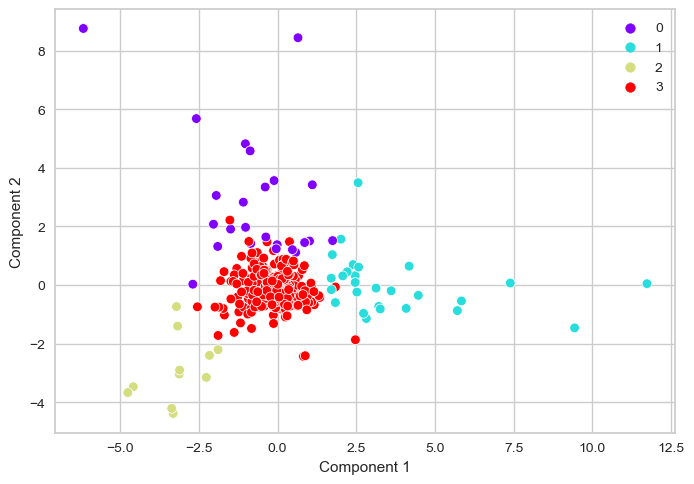

In [57]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

In [58]:
pca1 = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca1 = pca1.fit_transform(df_hc)
reduced_df_pca1 = pd.DataFrame(
    data=X_reduced_pca1, columns=["Component 1", "Component 2"]
)

In [59]:
pca1.explained_variance_ratio_.sum()

0.37128995677258525

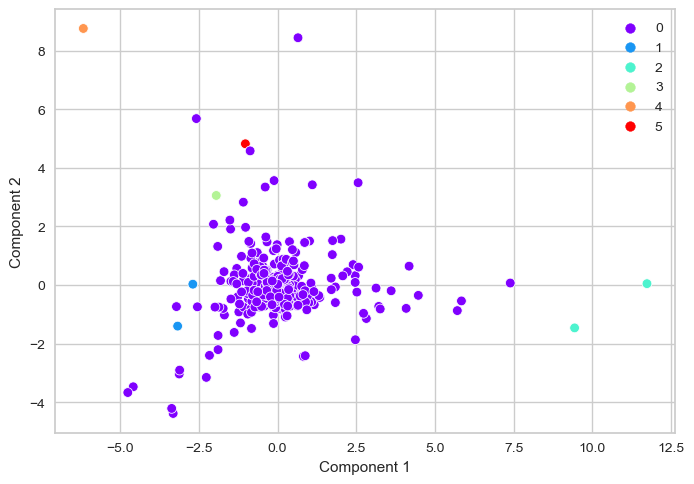

In [60]:
sns.scatterplot(
    data=reduced_df_pca1,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- K Means Clustering method is much more effective in differentiating 4 clusters compared to Hierarchical Clustering.
- K Means i was able to identify 4 clusters and 6 clusters for Hierarchical.

## Actionable Insights and Recommendations

- Highlight the importance of assessing and managing risks in stock investments. For example, Cluster 2 in the K-means segmentation exhibited higher volatility, which could be considered riskier. Balancing this with stocks from other clusters can help manage portfolio risk.
- Emphasize the benefits of long-term investment. Stocks from Cluster 0 in K-means, which had a high P/E ratio, might indicate companies with growth potential. Clients should consider these for long-term investments.
- Recommend stocks from Cluster 3 in K-means, which exhibited lower P/E ratios and could represent potential income-generating stocks due to their relative stability.
- Continuously monitor the performance of the recommended stocks and clusters. Regularly update clients on the progress of their investments.
- Encourage clients to conduct periodic reviews of their portfolios. Stocks may change clusters as market conditions and company performance evolve, and portfolio adjustments may be necessary.
- Clearly communicate the risks associated with investing in the stock market. Clients should fully understand the potential for both gains and losses.